### 1. In the german credit data, the data is not balanced as only of the people failed to repay the loan. So the task is to balance the dataset using a python module called imblearn. Complete the program using logistic regression till confusion matrix.

In [3]:
#Importing Necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#Reading data from CSV file
gd = pd.read_csv('german.data',sep='\t',header=0)

In [ ]:
gd.head()

,Status,Duration,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2


In [ ]:
gd.columns = ["account.status", "months", "credit.history",    
                  "purpose", "credit.amount", "savings",
                  "employment", "installment.rate", 
                  "personal.status", "guarantors", 
                  "residence", "property", "age", 
                  "other.installments", "housing",
                  "credit.cards", "job", "dependents", "phone",
                  "foreign.worker", "credit.rating"]

In [ ]:
gd.head()

,account.status,months,credit.history,purpose,credit.amount,savings,employment,installment.rate,personal.status,guarantors,residence,property,age,other.installments,housing,credit.cards,job,dependents,phone,foreign.worker,credit.rating
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2


In [ ]:
dum_gd = pd.get_dummies(gd)

In [ ]:
print(dum_gd.head())

   months  credit.amount  ...  foreign.worker_A201  foreign.worker_A202
0       6           1169  ...                    1                    0
1      48           5951  ...                    1                    0
2      12           2096  ...                    1                    0
3      42           7882  ...                    1                    0
4      24           4870  ...                    1                    0

[5 rows x 62 columns]


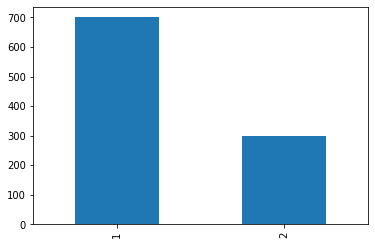

In [ ]:
gd['credit.rating'].value_counts().plot(kind='bar')

In [199]:
#Training logistic regression model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
#Creating dependent and independent variables
y = dum_gd['credit.rating'].values
X = dum_gd.drop('credit.rating',axis=1).values

In [ ]:
#Spliting data into testing and training 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [ ]:
lr = LogisticRegression(C=0.5,penalty='l1',solver='liblinear')
lr.fit(X_train, y_train)

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_predict = lr.predict(X_test)

#### Before Oversampling

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
print(accuracy_score(y_test,y_predict))

0.7433333333333333


In [ ]:
print("Missclassified", (y_predict!=y_test).sum())
print(confusion_matrix(y_predict,y_test))

Missclassified 77
[[180  43]
 [ 34  43]]


In [ ]:
#!pip3 install imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [ ]:
X_train_smote, y_train_smote = smote.fit_sample(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from collections import Counter
print("Before SMOTE :" , Counter(y_train))
print("After SMOTE :" , Counter(y_train_smote))

Before SMOTE : Counter({1: 486, 2: 214})
After SMOTE : Counter({2: 486, 1: 486})


In [ ]:
lr = LogisticRegression(C=0.5,penalty='l1',solver='liblinear')
lr.fit(X_train_smote, y_train_smote)

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_predict_smote = lr.predict(X_test)

#### After oversampling

In [ ]:
print(accuracy_score(y_test,y_predict))

0.7433333333333333


In [ ]:
print("Missclassified", (y_predict_smote!=y_test).sum())
print(confusion_matrix(y_predict_smote,y_test))

Missclassified 73
[[175  34]
 [ 39  52]]


#### Conclusion: Model accuracy not increased even if the data will be oversampled,we need to train other model for better accuracy.

### 2. In the udise dataset, we had created bar graph for girls and boys dropout for the state of West Bengal. Complete the same for the following states: Rajasthan, Madhya Pradesh, Karnataka, Tamil Nadu, Kerala and Maharashtra.

In [174]:
school = pd.read_csv("school_elem.csv", header = 0)

In [9]:
student = pd.read_csv("student_elem.csv", header = 0)

In [10]:
school.set_index("DISTCD",inplace=True)
student.set_index("DISTCD",inplace=True)

In [11]:
print(school.head())

               STATNAME  DISTNAME  DISTRICTS  ...  PGCFTCH  PCMTCH  PCFTCH
DISTCD                                        ...                         
101     JAMMU & KASHMIR   KUPWARA          1  ...       65     222     125
102     JAMMU & KASHMIR  BARAMULA          1  ...      155     463     196
103     JAMMU & KASHMIR  SRINAGAR          1  ...      108      56     115
104     JAMMU & KASHMIR    BADGAM          1  ...       90     317     120
105     JAMMU & KASHMIR   PULWAMA          1  ...       49     138      63

[5 rows x 435 columns]


In [12]:
school_student = pd.merge(student,school,left_index=True, right_index=True)

In [13]:
print(school_student.columns)

Index(['STATNAME_x', 'DISTNAME_x', 'C1_B', 'C2_B', 'C3_B', 'C4_B', 'C5_B',
       'C6_B', 'C7_B', 'C8_B',
       ...
       'TCH_TRNRF6', 'TCH_TRNRF7', 'PGRMTCH', 'PGRFTCH', 'GRMTCH', 'GRFTCH',
       'PGCMTCH', 'PGCFTCH', 'PCMTCH', 'PCFTCH'],
      dtype='object', length=817)


#### Madhya Pradesh

In [14]:
school_student.loc[school_student["STATNAME_x"] == "MADHYA PRADESH"]

,STATNAME_x,DISTNAME_x,C1_B,C2_B,C3_B,C4_B,C5_B,C6_B,C7_B,C8_B,C9_B,C1_G,C2_G,C3_G,C4_G,C5_G,C6_G,C7_G,C8_G,C9_G,C15A,C68A,C1_BD,C2_BD,C3_BD,C4_BD,C5_BD,C6_BD,C7_BD,C8_BD,C1_GD,C2_GD,C3_GD,C4_GD,C5_GD,C6_GD,C7_GD,C8_GD,C1_BR,C2_BR,...,TCHSTF4,TCHSTF5,TCHSTF6,TCHSTF7,TCHOBCM1,TCHOBCM2,TCHOBCM3,TCHOBCM4,TCHOBCM5,TCHOBCM6,TCHOBCM7,TCHOBCF1,TCHOBCF2,TCHOBCF3,TCHOBCF4,TCHOBCF5,TCHOBCF6,TCHOBCF7,TCH_TRNRM1,TCH_TRNRM2,TCH_TRNRM3,TCH_TRNRM4,TCH_TRNRM5,TCH_TRNRM6,TCH_TRNRM7,TCH_TRNRF1,TCH_TRNRF2,TCH_TRNRF3,TCH_TRNRF4,TCH_TRNRF5,TCH_TRNRF6,TCH_TRNRF7,PGRMTCH,PGRFTCH,GRMTCH,GRFTCH,PGCMTCH,PGCFTCH,PCMTCH,PCFTCH
DISTCD,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2301,MADHYA PRADESH,SHEOPUR,9430,9008,9217,9656,9822,7458,7631,7453,5772,8351,8084,8634,8840,8649,6314,7154,7040,4770,79123,33354,56,158,151,182,178,109,138,94,52,80,93,81,116,53,85,76,14,17,...,9,1,0,0,725,189,99,188,2,34,0,162,67,46,52,1,13,0,107,4,0,34,0,0,0,22,2,0,6,0,0,0,2419,704,2429,706,28,1,28,1
2302,MADHYA PRADESH,MORENA,24994,23285,24623,24171,25356,20337,20535,20595,18521,20849,19696,20429,20127,20217,16237,16899,17191,12282,203083,91646,294,300,333,290,326,279,138,173,162,294,268,245,251,128,188,152,86,75,...,23,0,3,0,1345,455,99,328,20,102,17,287,210,43,71,1,39,1,30,44,0,18,0,2,0,14,23,0,1,0,3,0,5342,1368,5342,1368,0,0,0,0
2303,MADHYA PRADESH,BHIND,19654,18923,19653,20904,21680,17632,17652,17868,15659,17520,17238,17516,18374,18490,14676,15717,16413,13530,147593,82296,103,174,241,221,242,182,164,158,111,158,166,190,193,160,128,121,226,187,...,9,0,8,0,739,507,68,333,17,38,2,174,265,30,65,4,21,0,205,0,0,96,0,0,0,52,0,0,12,0,0,0,5298,1266,5326,1275,0,0,0,0
2304,MADHYA PRADESH,GWALIOR,24825,24951,24917,24442,25479,22857,22551,22381,22575,20334,20608,20525,20453,20118,18243,18581,17959,17451,186996,95253,333,438,497,476,441,386,395,376,233,411,466,406,374,362,337,298,354,355,...,38,3,36,0,899,909,444,273,20,271,5,453,980,431,113,9,262,0,73,21,0,11,0,0,0,55,14,0,5,0,1,0,3604,2071,3613,2088,1,3,1,3
2305,MADHYA PRADESH,DATIA,7695,7879,8392,8524,9139,7458,8430,8704,10149,6769,6641,7262,7301,7468,6137,6947,7779,8041,71717,38874,42,75,95,113,103,104,96,105,44,57,87,77,70,75,67,60,37,48,...,45,0,2,0,594,285,88,217,4,85,5,202,198,81,68,0,93,9,134,2,0,65,0,0,0,22,1,0,16,0,0,0,2368,987,2377,995,0,0,0,0
2306,MADHYA PRADESH,SHIVPURI,20588,20966,22489,23147,24018,19565,22944,21941,20627,18726,18734,20179,20652,20674,16963,20564,20361,14360,193850,96166,274,269,290,268,244,305,220,208,232,242,204,187,182,196,168,129,39,37,...,38,0,4,0,1999,597,163,368,11,139,1,349,478,110,86,1,119,0,124,0,0,65,0,0,0,40,4,2,9,0,2,0,5949,1765,5973,1775,0,0,0,0
2307,MADHYA PRADESH,GUNA,15288,15920,17086,16314,17234,14631,15370,14989,12674,13575,14134,15060,15059,15222,12631,14552,13552,9386,129371,62111,72,95,155,134,109,124,99,79,51,108,102,80,70,91,94,66,410,433,...,23,0,9,0,1462,804,196,335,4,176,0,402,560,217,72,1,205,0,222,1,0,63,0,0,0,41,3,0,13,0,1,0,4347,1617,4369,1635,1,0,1,0
2308,MADHYA PRADESH,TIKAMGARH,18752,18718,19708,21315,22672,18262,18145,17914,18748,16044,15858,16878,18152,19051,15611,15851,16147,15196,154901,93574,52,71,97,138,145,107,108,106,46,48,63,75,88,84,89,75,27,27,...,20,0,2,0,1467,365,38,299,9,53,0,391,248,24,85,1,31,0,36,1,0,34,0,5,0,15,1,0,3,0,2,0,4764,1882,5199,2051,0,0,0,0
2309,MADHYA PRADESH,CHHATARPUR,22700,22169,23400,24680,26185,22848,24912,23874,24357,20094,19765,20668,21606,22555,19269,22020,21480,19095,194368,104250,194,213,272,266,294,189,254,215,139,169,173,218,206,162,192,204,253,219,...,20,1,6,0,1419,943,166,256,13,136,9,488,822,109,95,12,160,2,316,3,0,94,0,0,0,150,2,0,23,0,0,0,5076,2041,5093,2052,0,0,0,0


In [15]:
MP_df = school_student.loc[school_student["STATNAME_x"] == "MADHYA PRADESH"]

In [115]:
MP_df.describe()

,C1_B,C2_B,C3_B,C4_B,C5_B,C6_B,C7_B,C8_B,C9_B,C1_G,C2_G,C3_G,C4_G,C5_G,C6_G,C7_G,C8_G,C9_G,C15A,C68A,C1_BD,C2_BD,C3_BD,C4_BD,C5_BD,C6_BD,C7_BD,C8_BD,C1_GD,C2_GD,C3_GD,C4_GD,C5_GD,C6_GD,C7_GD,C8_GD,C1_BR,C2_BR,C3_BR,C4_BR,...,TCHSTF4,TCHSTF5,TCHSTF6,TCHSTF7,TCHOBCM1,TCHOBCM2,TCHOBCM3,TCHOBCM4,TCHOBCM5,TCHOBCM6,TCHOBCM7,TCHOBCF1,TCHOBCF2,TCHOBCF3,TCHOBCF4,TCHOBCF5,TCHOBCF6,TCHOBCF7,TCH_TRNRM1,TCH_TRNRM2,TCH_TRNRM3,TCH_TRNRM4,TCH_TRNRM5,TCH_TRNRM6,TCH_TRNRM7,TCH_TRNRF1,TCH_TRNRF2,TCH_TRNRF3,TCH_TRNRF4,TCH_TRNRF5,TCH_TRNRF6,TCH_TRNRF7,PGRMTCH,PGRFTCH,GRMTCH,GRFTCH,PGCMTCH,PGCFTCH,PCMTCH,PCFTCH
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,...,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.0,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.0,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,16525.725490,15852.333333,16280.058824,16218.333333,16587.509804,14943.607843,15732.098039,15384.882353,15358.588235,14973.588235,14322.823529,14777.215686,14733.705882,14818.039216,13134.176471,14272.921569,14319.607843,13525.862745,132352.647059,68767.000000,114.039216,138.431373,171.137255,177.607843,195.490196,160.294118,173.862745,170.196078,86.588235,110.901961,135.470588,132.411765,146.921569,120.078431,137.215686,134.333333,265.764706,236.215686,233.686275,229.137255,...,76.196078,0.784314,16.039216,0.156863,981.509804,455.470588,168.843137,330.039216,10.764706,104.352941,1.470588,443.529412,575.294118,215.862745,125.372549,6.156863,140.666667,1.058824,199.235294,6.705882,0.352941,70.666667,0.058824,0.274510,0.0,84.901961,6.607843,0.470588,23.784314,0.019608,0.450980,0.0,3749.901961,1698.823529,3851.843137,1756.549020,11.745098,6.823529,13.705882,8.196078
std,7265.031818,7047.446192,7044.042077,6913.271173,6989.183664,6401.066030,6593.527603,6501.049677,6528.225692,6331.002158,6203.533805,6193.908948,6076.070728,6055.162885,5618.237384,5963.662733,5936.354494,6076.815149,55395.568037,29827.448377,71.681228,84.862301,95.442133,95.896419,108.893411,84.506164,98.336569,111.589250,52.643775,77.829880,82.771095,83.245222,90.095914,72.781273,84.495518,88.357154,379.864533,309.725899,306.661735,291.127121,...,72.408568,1.500849,16.798763,0.612292,446.054094,276.388593,115.401451,176.004200,11.176025,75.612122,3.094207,250.088892,409.274543,203.034186,73.978094,12.309951,108.286226,2.428265,180.634060,12.551166,0.996464,56.375054,0.420084,0.826521,0.0,87.356798,11.884576,1.155040,25.767665,0.140028,0.807805,0.0,1440.026184,689.895404,1471.302680,703.229417,40.643249,23.247973,44.927183,26.099823
min,6123.000000,5934.000000,6183.000000,6264.000000,6130.000000,5935.000000,6156.000000,5347.000000,5456.000000,5616.000000,5407.000000,5516.000000,5689.000000,5705.000000,4908.000000,4454.000000,4387.000000,3655.000000,47384.000000,23547.000000,14.000000,33.000000,42.000000,54.000000,45.000000,44.000000,28.000000,30.000000,12.000000,26.000000,36.000000,25.000000,37.000000,19.000000,16.000000,27.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,182.000000,29.000000,4.000000,87.000000,0.000000,10.000000,0.000000,133.000000,67.000000,10.000000,43.000000,0.000000,13.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.0,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,1357.000000,567.000000,1364.000000,567.000000,0.000000,0.000000,0.000000,0.000000
25%,11160.000000,10274.000000,10813.000000,10805.000000,

In [17]:
MP_df.set_index("DISTNAME_x",inplace=True)

In [18]:
print(MP_df)

                 STATNAME_x   C1_B   C2_B  ...  PGCFTCH  PCMTCH  PCFTCH
DISTNAME_x                                 ...                         
SHEOPUR      MADHYA PRADESH   9430   9008  ...        1      28       1
MORENA       MADHYA PRADESH  24994  23285  ...        0       0       0
BHIND        MADHYA PRADESH  19654  18923  ...        0       0       0
GWALIOR      MADHYA PRADESH  24825  24951  ...        3       1       3
DATIA        MADHYA PRADESH   7695   7879  ...        0       0       0
SHIVPURI     MADHYA PRADESH  20588  20966  ...        0       0       0
GUNA         MADHYA PRADESH  15288  15920  ...        0       1       0
TIKAMGARH    MADHYA PRADESH  18752  18718  ...        0       0       0
CHHATARPUR   MADHYA PRADESH  22700  22169  ...        0       0       0
PANNA        MADHYA PRADESH  12872  12824  ...        0       3       0
SAGAR        MADHYA PRADESH  24632  24620  ...      158     308     173
DAMOH        MADHYA PRADESH  13801  13737  ...        4      12 

In [19]:
MP_dropout = pd.DataFrame({})

In [20]:
MP_dropout['B_C1C5'] = MP_df['C1_B'] - MP_df['C5_B']
MP_dropout['B_C1C9'] = MP_df['C1_B'] - MP_df['C9_B']
MP_dropout['B_C5C9'] = MP_df['C5_B'] - MP_df['C9_B']
MP_dropout['G_C1C5'] = MP_df['C1_G'] - MP_df['C5_G']
MP_dropout['G_C1C9'] = MP_df['C1_G'] - MP_df['C9_G']
MP_dropout['G_C5C9'] = MP_df['C5_G'] - MP_df['C9_G']

In [21]:
boys_do = list(dict(MP_dropout.loc['INDORE'][['B_C1C5','B_C1C9','B_C5C9']]).values())

In [22]:
girls_do = list(dict(MP_dropout.loc['INDORE'][['G_C1C5','G_C1C9','G_C5C9']]).values())

In [23]:
print(boys_do,girls_do)

[5120, 13092, 7972] [4890, 11429, 6539]


In [24]:
index = ["1-5","1-9","5-9"]

In [25]:
mapIN = pd.DataFrame({'Boys dropout':boys_do, 'Girls dropout':girls_do},index=index)

Text(0.5, 1.0, 'Indore')

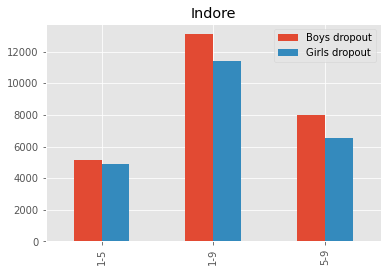

In [27]:
plt.style.use('ggplot')
mapIN.plot.bar()
plt.title("Indore")

#### Conclusion: From the above analysis we can say that most dropout students are from Class 1 to Class 9th Standard.

#### Rajasthan

In [28]:
school_student.loc[school_student["STATNAME_x"] == "RAJASTHAN"]

,STATNAME_x,DISTNAME_x,C1_B,C2_B,C3_B,C4_B,C5_B,C6_B,C7_B,C8_B,C9_B,C1_G,C2_G,C3_G,C4_G,C5_G,C6_G,C7_G,C8_G,C9_G,C15A,C68A,C1_BD,C2_BD,C3_BD,C4_BD,C5_BD,C6_BD,C7_BD,C8_BD,C1_GD,C2_GD,C3_GD,C4_GD,C5_GD,C6_GD,C7_GD,C8_GD,C1_BR,C2_BR,...,TCHSTF4,TCHSTF5,TCHSTF6,TCHSTF7,TCHOBCM1,TCHOBCM2,TCHOBCM3,TCHOBCM4,TCHOBCM5,TCHOBCM6,TCHOBCM7,TCHOBCF1,TCHOBCF2,TCHOBCF3,TCHOBCF4,TCHOBCF5,TCHOBCF6,TCHOBCF7,TCH_TRNRM1,TCH_TRNRM2,TCH_TRNRM3,TCH_TRNRM4,TCH_TRNRM5,TCH_TRNRM6,TCH_TRNRM7,TCH_TRNRF1,TCH_TRNRF2,TCH_TRNRF3,TCH_TRNRF4,TCH_TRNRF5,TCH_TRNRF6,TCH_TRNRF7,PGRMTCH,PGRFTCH,GRMTCH,GRFTCH,PGCMTCH,PGCFTCH,PCMTCH,PCFTCH
DISTCD,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
801,RAJASTHAN,GANGANAGAR,21753,22337,20185,19821,19618,19354,20216,18333,17398,18622,19440,17369,17055,16745,16604,17491,15793,14585,155202,80995,393,359,381,379,389,342,369,406,280,257,291,262,259,238,272,357,212,144,...,0,9,31,0,591,1603,2059,1,158,934,17,447,1256,1120,5,82,553,11,71,130,66,0,2,41,0,55,129,57,0,0,34,0,5020,3744,5135,3780,387,180,396,180
802,RAJASTHAN,HANUMANGARH,20960,21093,18624,17928,17401,16618,18120,16445,16168,18235,18806,16595,15857,15448,14283,15847,14567,13963,123367,72152,222,180,208,211,267,218,258,242,170,147,137,149,165,199,248,261,80,82,...,0,0,40,0,214,1635,2784,0,50,1417,20,137,883,1212,4,27,567,7,22,72,17,0,0,12,0,12,32,8,0,0,7,0,4466,1948,4498,1963,8,3,8,3
803,RAJASTHAN,BIKANER,34324,35792,32083,29289,28094,26345,26607,24540,21939,30109,31970,28474,26061,24386,22454,22263,19777,16016,247097,104005,186,249,281,351,376,333,360,262,78,146,198,205,208,236,232,199,400,423,...,0,5,30,0,1140,2384,1911,10,96,1121,13,528,1101,911,17,53,556,18,450,349,119,0,2,82,0,115,143,80,0,3,29,0,4431,2695,4598,2741,1486,660,1519,677
804,RAJASTHAN,CHURU,27166,27508,24745,23400,22658,22802,23205,21756,21160,24471,24946,22063,20292,20051,20184,20165,18346,16508,183825,94685,150,215,184,159,164,142,173,125,90,130,110,106,108,115,141,104,501,406,...,0,6,30,0,406,2137,3060,0,81,1918,29,241,1119,1167,15,36,718,18,99,351,44,0,2,76,2,33,161,27,0,1,36,1,5607,2243,5720,2288,830,197,850,206
805,RAJASTHAN,JHUNJHUNUN,25216,24279,22881,21487,21914,22671,23286,22998,22501,21198,20584,19188,17691,17961,18274,18996,18678,17884,160139,95463,88,131,185,186,215,216,211,150,47,99,102,101,97,126,133,114,253,121,...,0,7,65,2,474,1807,4012,0,297,1974,26,650,1835,2077,8,109,1293,35,105,184,36,0,0,31,0,93,114,18,0,0,13,0,5273,3724,5334,3763,851,399,851,404
806,RAJASTHAN,ALWAR,49666,50946,44890,41628,40985,40225,41170,39502,38711,41877,44349,39497,36075,35342,33562,34927,32247,30391,333745,170828,420,407,394,358,386,264,273,189,250,279,267,261,291,195,213,154,200,153,...,15,11,134,1,979,3098,3507,0,217,2273,20,557,1760,1268,28,82,930,8,66,179,41,0,1,41,0,30,55,19,0,0,12,0,10874,4989,10938,5038,684,283,689,286
807,RAJASTHAN,BHARATPUR,33375,36572,31858,29036,28874,28737,29072,27592,25368,27862,32831,27275,24782,24005,23447,24088,21946,20743,269327,122905,126,233,280,332,391,411,321,281,77,150,184,207,251,260,242,220,45,59,...,1,1,52,4,565,2427,2268,3,119,1507,29,153,692,410,10,20,338,8,88,98,78,0,0,18,0,30,64,12,0,0,6,0,7410,2488,7512,2521,392,81,398,88
808,RAJASTHAN,DHAULPUR,22841,27463,22694,18985,17110,15410,15925,13779,12388,18564,22912,18771,15727,14235,12506,13077,11477,10666,178238,66418,48,120,115,163,175,159,131,139,26,49,70,95,108,82,96,95,179,164,...,3,3,26,3,343,856,496,0,26,377,3,81,210,116,2,9,90,1,68,104,59,0,0,20,0,16,17,12,0,0,2,0,4497,1205,4556,1219,23,9,24,9
809,RAJASTHAN,KARAULI,21958,22834,19027,17888,17160,15323,15875,14756,14510,19050,21051,17410,15859,14941,12900,13346,12319,11497,154223,71856,137,234,259,217,208,80,87,76,58,139,154,104,101,48,58,49,290,274,...,3,6,50,0,289,694,494,1,14,438,2,80,123,55,1,1,61,3,125,65,2,1,0,2,0,31,23,1,0,0,0,0,5800,1305,5827,1313,63,11,66,12


In [135]:
RJ_df = school_student.loc[school_student["STATNAME_x"] == "RAJASTHAN"]

In [136]:
RJ_df.describe()

,C1_B,C2_B,C3_B,C4_B,C5_B,C6_B,C7_B,C8_B,C9_B,C1_G,C2_G,C3_G,C4_G,C5_G,C6_G,C7_G,C8_G,C9_G,C15A,C68A,C1_BD,C2_BD,C3_BD,C4_BD,C5_BD,C6_BD,C7_BD,C8_BD,C1_GD,C2_GD,C3_GD,C4_GD,C5_GD,C6_GD,C7_GD,C8_GD,C1_BR,C2_BR,C3_BR,C4_BR,...,TCHSTF4,TCHSTF5,TCHSTF6,TCHSTF7,TCHOBCM1,TCHOBCM2,TCHOBCM3,TCHOBCM4,TCHOBCM5,TCHOBCM6,TCHOBCM7,TCHOBCF1,TCHOBCF2,TCHOBCF3,TCHOBCF4,TCHOBCF5,TCHOBCF6,TCHOBCF7,TCH_TRNRM1,TCH_TRNRM2,TCH_TRNRM3,TCH_TRNRM4,TCH_TRNRM5,TCH_TRNRM6,TCH_TRNRM7,TCH_TRNRF1,TCH_TRNRF2,TCH_TRNRF3,TCH_TRNRF4,TCH_TRNRF5,TCH_TRNRF6,TCH_TRNRF7,PGRMTCH,PGRFTCH,GRMTCH,GRFTCH,PGCMTCH,PGCFTCH,PCMTCH,PCFTCH
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.00000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,...,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,28647.757576,28557.848485,25598.484848,23970.727273,23652.090909,22902.303030,23226.515152,21448.636364,20812.757576,24893.303030,25441.575758,22410.121212,20760.212121,20214.000000,19270.818182,19639.393939,17611.818182,16116.000000,196820.606061,92993.424242,204.909091,243.393939,266.030303,269.30303,293.272727,229.848485,225.454545,199.757576,135.454545,168.181818,183.060606,177.969697,194.303030,164.939394,164.303030,145.606061,319.030303,205.515152,167.606061,147.878788,...,3.090909,4.848485,59.303030,0.848485,652.757576,1746.303030,1862.484848,1.272727,79.212121,964.969697,13.424242,324.545455,921.939394,647.666667,9.515152,28.393939,410.848485,7.272727,180.666667,191.575758,56.272727,0.030303,0.484848,27.030303,0.060606,58.636364,68.212121,20.181818,0.151515,0.242424,9.787879,0.060606,6556.484848,2694.393939,6663.242424,2737.666667,406.545455,139.696970,425.787879,146.090909
std,16095.136826,15897.082468,14397.139013,13493.698125,13141.503891,12526.234811,12486.474961,12256.009691,11767.599870,13671.599942,13725.110935,12396.281367,11561.480079,11213.925224,10653.653923,10774.478543,10531.405896,9882.755945,104035.292784,50015.755796,121.224833,123.283702,126.422033,123.05829,136.246163,111.366546,109.981843,110.031822,91.729593,93.634080,97.591924,100.260749,104.677029,88.383023,82.681046,83.582272,313.448509,206.520447,175.123874,157.191714,...,3.794434,5.432088,61.367991,1.543559,477.826396,1147.090817,1586.987518,2.197623,81.257599,873.809314,11.366151,228.356505,659.638108,599.132324,10.326305,31.639512,383.513536,7.657809,162.962355,145.032761,38.232245,0.174078,1.003781,22.176120,0.348155,46.101666,45.416653,18.769081,0.364110,0.613917,9.436490,0.242306,2631.532540,1709.649214,2641.800345,1718.010035,538.964058,166.499903,550.743121,170.135491
min,13188.000000,13105.000000,11664.000000,9946.000000,9436.000000,9007.000000,7938.000000,6773.000000,5841.000000,10558.000000,11090.000000,8851.000000,7693.000000,7114.000000,5860.000000,4988.000000,3866.000000,2425.000000,80454.000000,26455.000000,48.000000,46.000000,73.000000,89.00000,85.000000,67.000000,45.000000,65.000000,26.000000,36.000000,51.000000,52.000000,54.000000,36.000000,31.000000,20.000000,7.000000,7.000000,4.000000,3.000000,...,0.000000,0.000000,7.000000,0.000000,160.000000,248.000000,354.000000,0.000000,6.000000,85.000000,0.000000,80.000000,123.000000,55.000000,0.000000,0.000000,49.000000,0.000000,22.000000,26.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2915.000000,649.000000,2981.000000,665.000000,8.0

In [31]:
RJ_df.set_index("DISTNAME_x",inplace=True)

In [137]:
print(RJ_df)

       STATNAME_x         DISTNAME_x   C1_B  ...  PGCFTCH  PCMTCH  PCFTCH
DISTCD                                       ...                         
801     RAJASTHAN         GANGANAGAR  21753  ...      180     396     180
802     RAJASTHAN        HANUMANGARH  20960  ...        3       8       3
803     RAJASTHAN            BIKANER  34324  ...      660    1519     677
804     RAJASTHAN              CHURU  27166  ...      197     850     206
805     RAJASTHAN         JHUNJHUNUN  25216  ...      399     851     404
806     RAJASTHAN              ALWAR  49666  ...      283     689     286
807     RAJASTHAN          BHARATPUR  33375  ...       81     398      88
808     RAJASTHAN           DHAULPUR  22841  ...        9      24       9
809     RAJASTHAN            KARAULI  21958  ...       11      66      12
810     RAJASTHAN     SAWAI MADHOPUR  17910  ...       37     213      38
811     RAJASTHAN              Dausa  22123  ...        6      10       6
812     RAJASTHAN             JAIPUR  

In [138]:
RJ_dropout = pd.DataFrame({})

In [139]:
RJ_dropout['B_C1C5'] = RJ_df['C1_B'] - RJ_df['C5_B']
RJ_dropout['B_C1C9'] = RJ_df['C1_B'] - RJ_df['C9_B']
RJ_dropout['B_C5C9'] = RJ_df['C5_B'] - RJ_df['C9_B']
RJ_dropout['G_C1C5'] = RJ_df['C1_G'] - RJ_df['C5_G']
RJ_dropout['G_C1C9'] = RJ_df['C1_G'] - RJ_df['C9_G']
RJ_dropout['G_C5C9'] = RJ_df['C5_G'] - RJ_df['C9_G']

In [35]:
boys_do = list(dict(RJ_dropout.loc['JAIPUR'][['B_C1C5','B_C1C9','B_C5C9']]).values())

In [36]:
girls_do = list(dict(MP_dropout.loc['INDORE'][['G_C1C5','G_C1C9','G_C5C9']]).values())

In [37]:
print(boys_do,girls_do)

[15490, 22185, 6695] [4890, 11429, 6539]


In [38]:
index = ["1-5","1-9","5-9"]

In [41]:
mapJP = pd.DataFrame({'Boys dropout':boys_do, 'Girls dropout':girls_do},index=index)

Text(0.5, 1.0, 'Jaipur')

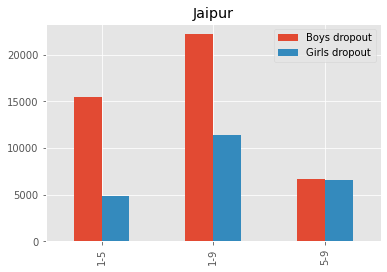

In [42]:
plt.style.use('ggplot')
mapJP.plot.bar()
plt.title("Jaipur")

#### Conclusion: From the above analysis we can say that most dropout students are from Class 1 to Class 9th Standard.

#### Karnataka

In [49]:
school_student.loc[school_student["STATNAME_x"] == "KARNATAKA"]

,STATNAME_x,DISTNAME_x,C1_B,C2_B,C3_B,C4_B,C5_B,C6_B,C7_B,C8_B,C9_B,C1_G,C2_G,C3_G,C4_G,C5_G,C6_G,C7_G,C8_G,C9_G,C15A,C68A,C1_BD,C2_BD,C3_BD,C4_BD,C5_BD,C6_BD,C7_BD,C8_BD,C1_GD,C2_GD,C3_GD,C4_GD,C5_GD,C6_GD,C7_GD,C8_GD,C1_BR,C2_BR,...,TCHSTF4,TCHSTF5,TCHSTF6,TCHSTF7,TCHOBCM1,TCHOBCM2,TCHOBCM3,TCHOBCM4,TCHOBCM5,TCHOBCM6,TCHOBCM7,TCHOBCF1,TCHOBCF2,TCHOBCF3,TCHOBCF4,TCHOBCF5,TCHOBCF6,TCHOBCF7,TCH_TRNRM1,TCH_TRNRM2,TCH_TRNRM3,TCH_TRNRM4,TCH_TRNRM5,TCH_TRNRM6,TCH_TRNRM7,TCH_TRNRF1,TCH_TRNRF2,TCH_TRNRF3,TCH_TRNRF4,TCH_TRNRF5,TCH_TRNRF6,TCH_TRNRF7,PGRMTCH,PGRFTCH,GRMTCH,GRFTCH,PGCMTCH,PGCFTCH,PCMTCH,PCFTCH
DISTCD,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2901,KARNATAKA,BELGAUM,21099,22314,21305,20429,19896,19760,19213,18372,18636,19271,18976,19809,19151,19492,18190,17409,16739,16578,190059,101746,167,223,202,205,219,214,202,126,123,132,153,159,179,150,167,97,0,0,...,0,1,13,3,336,1000,9,6,0,87,64,321,870,4,23,1,109,24,935,3388,73,29,23,315,163,986,4062,59,69,43,491,70,3729,3525,3850,3590,7,7,10,9
2902,KARNATAKA,BAGALKOT,22271,21733,21277,20701,20823,20092,19031,18007,17482,19835,19426,19666,19904,19915,18159,17809,16879,15478,193548,100893,184,369,272,303,343,241,265,101,133,322,240,285,278,192,180,103,6,1,...,4,0,12,1,629,2409,27,19,41,376,100,488,1960,45,27,12,350,60,505,2319,0,2,0,234,20,313,1797,0,20,0,169,21,3941,2794,3947,2797,5,0,5,0
2903,KARNATAKA,BIJAPUR (KARNATAKA),30037,30469,28576,28228,26390,23764,22963,20643,19352,26214,27115,26051,26584,24855,20995,20619,18223,15905,261535,117901,98,348,295,302,314,262,257,135,98,219,198,276,242,181,209,97,0,0,...,3,0,13,3,1517,3510,4,44,8,360,124,1290,2784,1,43,2,214,57,689,2037,0,0,0,178,14,348,1149,0,8,0,50,5,5498,3421,5509,3424,0,0,0,0
2904,KARNATAKA,GULBARGA,30186,31905,31685,31652,31200,27986,27642,22721,21576,27466,29556,29395,29545,29172,24573,24369,20856,18489,280632,133287,116,121,199,474,270,208,218,112,96,109,119,446,213,154,176,94,561,517,...,5,0,25,5,971,2588,7,23,2,329,167,1317,3604,7,50,2,855,94,319,932,0,0,0,84,8,236,1014,0,5,0,136,1,4350,3984,4411,4034,9,10,9,10
2905,KARNATAKA,BIDAR,19713,20536,19891,19653,20795,17833,17569,14341,14115,17578,18670,18226,18375,19151,16076,16207,13390,13270,176051,85648,54,73,95,92,260,205,195,95,50,58,71,95,197,163,164,94,13,10,...,0,0,5,8,566,1908,0,6,6,186,58,715,1988,0,14,1,238,23,859,3352,0,7,12,217,141,943,3016,0,20,3,302,59,3195,2592,3205,2603,0,0,0,0
2906,KARNATAKA,RAICHUR,22923,22732,21958,21493,20960,19399,18955,16122,15132,20735,21491,21175,20158,19406,17110,17211,14325,12617,200392,94588,137,173,151,154,232,207,188,90,105,141,111,154,185,165,140,58,75,64,...,0,1,24,12,760,1857,11,2,11,326,115,696,1951,13,24,4,504,44,1042,2599,0,0,24,347,155,706,2491,0,8,5,272,51,3882,3084,3882,3084,0,1,0,1
2907,KARNATAKA,KOPPAL,15985,15705,15227,15716,15265,14294,14657,12728,11884,14433,14754,14450,14905,14456,12658,13198,11155,10335,142469,72010,94,144,147,256,167,148,154,87,81,89,123,202,102,93,118,70,130,89,...,0,0,14,3,553,1814,47,6,0,268,121,590,1430,47,10,0,219,70,82,405,0,0,0,11,6,44,201,0,0,0,6,5,3038,2042,3057,2061,29,24,29,24
2908,KARNATAKA,GADAG,10448,10399,10236,9879,9892,9473,8604,8850,8812,9851,9393,9630,9383,9609,8598,8299,8163,8164,91624,46583,134,168,166,218,263,253,239,155,94,131,138,189,224,232,201,118,109,125,...,5,0,9,1,240,1093,0,15,30,221,55,347,976,0,16,10,196,36,87,531,0,0,20,98,16,67,371,0,4,9,65,4,2125,1629,2129,1634,9,2,9,2
2909,KARNATAKA,DHARWAD,17750,17603,17372,17283,17203,16554,16214,15552,15518,16285,16349,16453,15898,16405,15016,15052,14461,14402,157381,84688,143,176,149,177,223,220,202,130,101,125,99,150,207,214,208,116,175,152,...,0,0,54,2,170,885,23,1,17,194,48,379,1526,14,7,10,487,45,133,700,0,0,0,53,10,167,884,0,4,0,44,7,1935,3008,1950,3018,0,0,0,0


In [52]:
KR_df = school_student.loc[school_student["STATNAME_x"] == "KARNATAKA"]

In [53]:
KR_df.describe()

,C1_B,C2_B,C3_B,C4_B,C5_B,C6_B,C7_B,C8_B,C9_B,C1_G,C2_G,C3_G,C4_G,C5_G,C6_G,C7_G,C8_G,C9_G,C15A,C68A,C1_BD,C2_BD,C3_BD,C4_BD,C5_BD,C6_BD,C7_BD,C8_BD,C1_GD,C2_GD,C3_GD,C4_GD,C5_GD,C6_GD,C7_GD,C8_GD,C1_BR,C2_BR,C3_BR,C4_BR,...,TCHSTF4,TCHSTF5,TCHSTF6,TCHSTF7,TCHOBCM1,TCHOBCM2,TCHOBCM3,TCHOBCM4,TCHOBCM5,TCHOBCM6,TCHOBCM7,TCHOBCF1,TCHOBCF2,TCHOBCF3,TCHOBCF4,TCHOBCF5,TCHOBCF6,TCHOBCF7,TCH_TRNRM1,TCH_TRNRM2,TCH_TRNRM3,TCH_TRNRM4,TCH_TRNRM5,TCH_TRNRM6,TCH_TRNRM7,TCH_TRNRF1,TCH_TRNRF2,TCH_TRNRF3,TCH_TRNRF4,TCH_TRNRF5,TCH_TRNRF6,TCH_TRNRF7,PGRMTCH,PGRFTCH,GRMTCH,GRFTCH,PGCMTCH,PGCFTCH,PCMTCH,PCFTCH
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,...,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,17098.029412,16838.117647,16706.088235,16319.117647,16016.764706,15385.411765,15122.000000,14348.911765,13971.000000,15578.088235,15554.147059,15633.382353,15261.794118,15122.294118,13923.970588,13922.676471,13164.470588,12642.411765,149688.205882,79436.529412,112.823529,155.882353,166.588235,194.764706,227.411765,198.500000,209.529412,114.382353,81.588235,110.117647,122.000000,156.470588,171.823529,145.852941,157.441176,88.764706,107.088235,97.500000,92.294118,90.588235,...,1.500000,0.500000,27.323529,3.735294,532.205882,1277.382353,22.764706,8.470588,7.029412,184.852941,67.411765,581.647059,1839.617647,93.441176,17.294118,3.264706,453.058824,40.529412,462.558824,1095.676471,2.411765,4.088235,3.264706,63.764706,26.352941,398.911765,1250.705882,2.117647,7.941176,2.558824,75.382353,12.705882,2541.441176,2560.529412,2557.352941,2574.352941,10.823529,9.411765,11.058824,9.617647
std,11110.515395,10666.634301,10791.618084,10198.239559,9487.537430,8826.007561,8434.144641,7810.059238,7293.019061,9995.295943,9652.568238,9914.826192,9336.535899,8805.720639,8085.428133,7734.325403,7293.962137,6762.698435,92973.656673,43466.934677,62.354544,86.336468,76.934099,94.122763,90.900251,83.359117,90.460182,49.009594,42.689945,63.823984,55.947486,85.396485,67.836019,59.710987,58.833711,36.971782,131.681058,118.253259,111.799477,108.952622,...,2.299539,1.581139,33.627839,3.727936,313.385210,736.159856,61.037524,9.614494,9.050315,126.014701,41.073561,271.995419,789.249011,376.977870,12.534871,4.259100,616.049729,20.092567,323.865310,895.870686,12.519361,7.537252,7.170262,90.492946,41.960214,274.684984,906.923188,10.188421,12.543116,7.836168,106.359600,16.679745,1248.018920,774.912399,1255.646010,781.752029,18.704189,12.903177,19.244741,13.200126
min,4109.000000,4151.000000,3989.000000,3946.000000,3888.000000,4190.000000,4220.000000,4234.000000,4383.000000,3903.000000,3886.000000,3840.000000,3893.000000,3869.000000,3884.000000,3973.000000,3978.000000,4053.000000,36932.000000,23032.000000,36.000000,36.000000,44.000000,61.000000,56.000000,60.000000,55.000000,31.000000,30.000000,29.000000,31.000000,40.000000,39.000000,28.000000,48.000000,28.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,2.000000,0.000000,53.000000,215.000000,0.000000,0.000000,0.000000,12.000000,3.000000,182.000000,858.000000,0.000000,0.000000,0.000000,23.000000,10.000000,14.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.000000,201.000000,0.000000,0.000000,0.000000,0.000000,0.000000,419.000000,1177.000000,420.000000,1179.000000,0.000000,0.000000,0.000000,0.000000
25

In [54]:
KR_df.set_index("DISTNAME_x",inplace=True)

In [55]:
print(KR_df)

                     STATNAME_x   C1_B   C2_B  ...  PGCFTCH  PCMTCH  PCFTCH
DISTNAME_x                                     ...                         
BELGAUM               KARNATAKA  21099  22314  ...        7      10       9
BAGALKOT              KARNATAKA  22271  21733  ...        0       5       0
BIJAPUR (KARNATAKA)   KARNATAKA  30037  30469  ...        0       0       0
GULBARGA              KARNATAKA  30186  31905  ...       10       9      10
BIDAR                 KARNATAKA  19713  20536  ...        0       0       0
RAICHUR               KARNATAKA  22923  22732  ...        1       0       1
KOPPAL                KARNATAKA  15985  15705  ...       24      29      24
GADAG                 KARNATAKA  10448  10399  ...        2       9       2
DHARWAD               KARNATAKA  17750  17603  ...        0       0       0
UTTARA KANNADA        KARNATAKA   4874   4867  ...       12       3      12
HAVERI                KARNATAKA  15369  14505  ...        7      10       7
BELLARY     

In [56]:
KR_dropout = pd.DataFrame({})

In [57]:
KR_dropout['B_C1C5'] = KR_df['C1_B'] - KR_df['C5_B']
KR_dropout['B_C1C9'] = KR_df['C1_B'] - KR_df['C9_B']
KR_dropout['B_C5C9'] = KR_df['C5_B'] - KR_df['C9_B']
KR_dropout['G_C1C5'] = KR_df['C1_G'] - KR_df['C5_G']
KR_dropout['G_C1C9'] = KR_df['C1_G'] - KR_df['C9_G']
KR_dropout['G_C5C9'] = KR_df['C5_G'] - KR_df['C9_G']

In [59]:
boys_do = list(dict(KR_dropout.loc['MYSORE'][['B_C1C5','B_C1C9','B_C5C9']]).values())

In [58]:
girls_do = list(dict(KR_dropout.loc['MYSORE'][['G_C1C5','G_C1C9','G_C5C9']]).values())

In [60]:
print(boys_do,girls_do)

[937, 1650, 713] [791, 1678, 887]


In [61]:
index = ["1-5","1-9","5-9"]

In [63]:
mapMY = pd.DataFrame({'Boys dropout':boys_do, 'Girls dropout':girls_do},index=index)

Text(0.5, 1.0, 'Mysore')

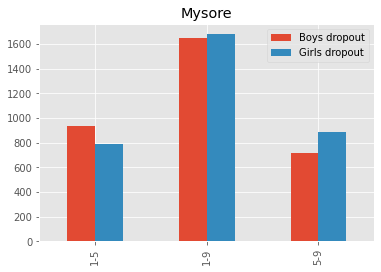

In [64]:
plt.style.use('ggplot')
mapMY.plot.bar()
plt.title("Mysore")

#### Conclusion: From the above analysis we can say that most dropout students are from Class 1 to Class 9th Standard But lesser then MP and Rajasthan.

#### Kerala

In [65]:
school_student.loc[school_student["STATNAME_x"] == "KERALA"]

,STATNAME_x,DISTNAME_x,C1_B,C2_B,C3_B,C4_B,C5_B,C6_B,C7_B,C8_B,C9_B,C1_G,C2_G,C3_G,C4_G,C5_G,C6_G,C7_G,C8_G,C9_G,C15A,C68A,C1_BD,C2_BD,C3_BD,C4_BD,C5_BD,C6_BD,C7_BD,C8_BD,C1_GD,C2_GD,C3_GD,C4_GD,C5_GD,C6_GD,C7_GD,C8_GD,C1_BR,C2_BR,...,TCHSTF4,TCHSTF5,TCHSTF6,TCHSTF7,TCHOBCM1,TCHOBCM2,TCHOBCM3,TCHOBCM4,TCHOBCM5,TCHOBCM6,TCHOBCM7,TCHOBCF1,TCHOBCF2,TCHOBCF3,TCHOBCF4,TCHOBCF5,TCHOBCF6,TCHOBCF7,TCH_TRNRM1,TCH_TRNRM2,TCH_TRNRM3,TCH_TRNRM4,TCH_TRNRM5,TCH_TRNRM6,TCH_TRNRM7,TCH_TRNRF1,TCH_TRNRF2,TCH_TRNRF3,TCH_TRNRF4,TCH_TRNRF5,TCH_TRNRF6,TCH_TRNRF7,PGRMTCH,PGRFTCH,GRMTCH,GRFTCH,PGCMTCH,PGCFTCH,PCMTCH,PCFTCH
DISTCD,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3201,KERALA,KASARAGOD,11837,11699,11563,11194,11101,11221,11401,11150,11737,11366,10827,10976,10637,10755,10564,10744,10487,10596,97969,53343,220,338,363,484,340,367,387,338,168,230,250,317,264,249,248,223,112,97,...,0,17,26,2,297,357,677,10,232,142,21,738,953,1199,36,258,748,25,109,169,55,8,28,18,0,219,215,72,12,51,11,1,1832,2386,1837,2388,98,308,101,310
3202,KERALA,KANNUR,20013,20038,20090,19462,19656,19612,19373,19980,20640,19203,19307,18985,18838,18877,18999,18685,19156,19524,176747,98681,361,357,413,443,487,457,498,626,218,244,262,331,355,360,381,551,0,0,...,0,19,9,0,762,931,591,56,625,135,24,2179,2626,1813,130,930,885,34,518,606,65,25,110,19,9,1388,1418,102,41,169,16,30,1579,2317,1584,2331,72,273,72,275
3203,KERALA,WAYANAD,6798,6786,6656,6878,7065,6786,7144,7316,7517,6506,6593,6468,6492,6572,6573,6771,7057,7085,58939,34500,113,151,187,238,307,345,306,377,101,127,136,148,263,291,278,324,13,14,...,0,18,25,1,110,136,154,6,106,95,2,210,341,307,9,126,234,11,72,49,3,0,4,4,0,137,72,1,9,4,7,0,954,1535,954,1536,21,62,21,62
3204,KERALA,KOZHIKODE,24141,23807,23707,23868,24167,24569,24697,25261,25762,22830,23071,22946,22451,23232,23783,23568,24266,24376,210245,122391,747,795,1078,1276,1284,1374,1445,1365,472,546,769,823,1082,1153,1105,1053,7,4,...,8,34,31,2,1098,1348,630,108,1178,224,48,2403,2362,1486,120,1318,1146,88,207,220,64,5,83,7,5,404,432,65,18,158,18,17,1939,2739,1981,2804,44,152,44,157
3205,KERALA,MALAPPURAM,42093,42017,41809,41805,41399,40737,42337,43283,44505,40280,40105,40408,39985,40307,39296,40065,41548,41094,362605,205937,859,1060,1200,1385,1437,1353,1303,1009,667,763,931,1141,1216,1210,1114,893,89,107,...,4,22,46,0,1556,1620,942,495,1532,620,58,3303,2878,1714,525,1547,1904,92,364,271,1,112,34,20,1,691,408,2,138,28,32,4,3269,4985,3297,5027,63,237,64,237
3206,KERALA,PALAKKAD,21729,21980,21631,21475,21567,21385,21426,23098,24647,21003,20965,20780,20325,21177,20565,20679,22271,22843,188500,105804,452,452,561,575,760,750,852,855,282,330,387,447,689,710,758,692,111,112,...,7,42,15,3,482,468,237,64,761,123,17,1561,1814,1111,91,1603,689,44,156,197,1,8,93,14,0,621,625,17,46,283,38,0,1520,3790,1537,3830,29,132,29,134
3207,KERALA,THRISSUR,22238,22478,22140,21719,22240,22562,22616,23401,24932,21076,21301,21264,20498,20977,21470,21618,22072,22692,197980,115653,504,707,753,875,1259,1364,1355,1444,373,507,502,641,994,1021,1096,1103,18,7,...,3,43,21,4,105,152,279,16,341,45,27,1046,1301,1954,100,1550,555,166,103,141,19,23,120,1,23,1277,1245,128,162,579,122,117,733,3451,744,3470,15,72,15,73
3208,KERALA,ERNAKULAM,23077,23752,22692,22715,23246,22866,23168,23753,24486,21497,22654,21808,21526,21742,21932,22079,22540,23003,202651,119216,440,534,571,681,892,897,918,1172,277,339,381,431,580,579,529,632,13,10,...,0,22,27,3,139,106,283,15,278,98,55,1220,1037,2364,64,1466,1088,381,87,65,29,9,65,11,49,750,459,188,34,321,128,267,794,3270,812,3312,3,65,4,69
3209,KERALA,IDUKKI,7231,7367,7534,7201,7224,7152,7425,7619,7979,6907,6969,6947,7028,6860,6678,6859,7041,7092,63909,36766,239,155,198,176,278,255,287,278,108,148,145,134,179,204,186,200,52,47,...,6,17,32,7,101,43,119,9,44,46,15,319,198,411,38,91,245,36,69,22,9,8,19,11,13,189,78,25,6,74,12,24,647,1460,652,1493,28,76,30,78


In [67]:
KE_df = school_student.loc[school_student["STATNAME_x"] == "KERALA"]

In [68]:
KE_df.describe()

,C1_B,C2_B,C3_B,C4_B,C5_B,C6_B,C7_B,C8_B,C9_B,C1_G,C2_G,C3_G,C4_G,C5_G,C6_G,C7_G,C8_G,C9_G,C15A,C68A,C1_BD,C2_BD,C3_BD,C4_BD,C5_BD,C6_BD,C7_BD,C8_BD,C1_GD,C2_GD,C3_GD,C4_GD,C5_GD,C6_GD,C7_GD,C8_GD,C1_BR,C2_BR,C3_BR,C4_BR,...,TCHSTF4,TCHSTF5,TCHSTF6,TCHSTF7,TCHOBCM1,TCHOBCM2,TCHOBCM3,TCHOBCM4,TCHOBCM5,TCHOBCM6,TCHOBCM7,TCHOBCF1,TCHOBCF2,TCHOBCF3,TCHOBCF4,TCHOBCF5,TCHOBCF6,TCHOBCF7,TCH_TRNRM1,TCH_TRNRM2,TCH_TRNRM3,TCH_TRNRM4,TCH_TRNRM5,TCH_TRNRM6,TCH_TRNRM7,TCH_TRNRF1,TCH_TRNRF2,TCH_TRNRF3,TCH_TRNRF4,TCH_TRNRF5,TCH_TRNRF6,TCH_TRNRF7,PGRMTCH,PGRFTCH,GRMTCH,GRFTCH,PGCMTCH,PGCFTCH,PCMTCH,PCFTCH
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,...,14.000000,14.000000,14.000000,14.00000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.00000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,17902.571429,18091.857143,17921.428571,17857.000000,18106.500000,18075.714286,18365.285714,18912.571429,19625.714286,17102.571429,17264.428571,17186.642857,17025.571429,17315.642857,17340.142857,17478.714286,18063.571429,18293.714286,158535.357143,92122.714286,400.142857,454.071429,533.214286,605.571429,740.142857,760.642857,785.785714,813.714286,271.857143,317.785714,371.000000,433.500000,584.285714,620.142857,625.000000,634.142857,36.071429,36.500000,31.571429,33.142857,...,2.785714,23.714286,27.785714,2.50000,391.071429,419.785714,357.214286,71.214286,481.571429,137.571429,34.714286,1319.928571,1264.142857,1323.285714,123.214286,968.142857,732.642857,123.500000,146.000000,140.500000,21.714286,19.857143,46.571429,9.571429,11.500000,562.142857,428.714286,58.571429,52.857143,148.50000,38.857143,57.357143,1281.571429,3003.428571,1294.142857,3028.428571,32.928571,123.428571,33.785714,125.285714
std,9468.626728,9408.898667,9300.823989,9286.355475,9227.419872,9122.968237,9369.643778,9618.114254,9930.386997,9018.867972,9027.281162,9019.441050,8836.369858,8982.989117,8826.647459,8909.110984,9264.420242,9220.322241,81253.227660,46195.767719,212.820205,263.023972,310.601941,371.488630,399.186453,410.128987,412.209651,390.310020,155.879074,183.849511,239.115357,283.254914,352.617777,363.270160,358.436992,315.466652,42.154413,42.853507,37.409818,36.946650,...,3.092884,10.557014,17.923678,2.47293,450.387434,510.290593,260.564824,127.234598,450.616111,149.763256,24.552702,920.767110,890.486112,756.712061,133.737503,667.379590,479.365222,120.501357,135.274081,156.607176,22.808327,27.667969,40.372714,6.824326,13.477902,376.151127,418.070555,52.659595,46.866188,159.63504,40.090009,71.838073,773.992518,1330.173888,780.516087,1338.707282,28.380557,90.252393,29.004452,90.651852
min,6725.000000,6786.000000,6656.000000,6878.000000,7065.000000,6786.000000,7144.000000,7316.000000,7517.000000,6506.000000,6593.000000,6468.000000,6492.000000,6572.000000,6573.000000,6771.000000,7041.000000,7085.000000,58939.000000,34500.000000,113.000000,151.000000,187.000000,176.000000,278.000000,255.000000,287.000000,278.000000,87.000000,94.000000,129.000000,123.000000,159.000000,204.000000,186.000000,200.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,12.000000,8.000000,0.00000,64.000000,43.000000,102.000000,6.000000,44.000000,23.000000,2.000000,210.000000,198.000000,307.000000,9.000000,91.000000,96.000000,11.000000,45.000000,19.000000,1.000000,0.000000,4.000000,1.000000,0.000000,137.000000,69.000000,1.000000,6.000000,4.00000,7.000000,0.000000,492.000000,1460.000000,497.00000

In [69]:
KE_df.set_index("DISTNAME_x",inplace=True)

In [70]:
print(KE_df)

                   STATNAME_x   C1_B   C2_B  ...  PGCFTCH  PCMTCH  PCFTCH
DISTNAME_x                                   ...                         
KASARAGOD              KERALA  11837  11699  ...      308     101     310
KANNUR                 KERALA  20013  20038  ...      273      72     275
WAYANAD                KERALA   6798   6786  ...       62      21      62
KOZHIKODE              KERALA  24141  23807  ...      152      44     157
MALAPPURAM             KERALA  42093  42017  ...      237      64     237
PALAKKAD               KERALA  21729  21980  ...      132      29     134
THRISSUR               KERALA  22238  22478  ...       72      15      73
ERNAKULAM              KERALA  23077  23752  ...       65       4      69
IDUKKI                 KERALA   7231   7367  ...       76      30      78
KOTTAYAM               KERALA  11956  12535  ...       76      14      76
ALAPPUZHA              KERALA  12913  13309  ...       34       6      35
PATHANAMTHITTA         KERALA   6725  

In [71]:
KE_dropout = pd.DataFrame({})

In [72]:
KE_dropout['B_C1C5'] = KE_df['C1_B'] - KE_df['C5_B']
KE_dropout['B_C1C9'] = KE_df['C1_B'] - KE_df['C9_B']
KE_dropout['B_C5C9'] = KE_df['C5_B'] - KE_df['C9_B']
KE_dropout['G_C1C5'] = KE_df['C1_G'] - KE_df['C5_G']
KE_dropout['G_C1C9'] = KE_df['C1_G'] - KE_df['C9_G']
KE_dropout['G_C5C9'] = KE_df['C5_G'] - KE_df['C9_G']

In [73]:
boys_do = list(dict(KE_dropout.loc['MALAPPURAM'][['B_C1C5','B_C1C9','B_C5C9']]).values())

In [74]:
girls_do = list(dict(KE_dropout.loc['MALAPPURAM'][['G_C1C5','G_C1C9','G_C5C9']]).values())

In [75]:
print(boys_do,girls_do)

[694, -2412, -3106] [-27, -814, -787]


In [76]:
index = ["1-5","1-9","5-9"]

In [77]:
mapML = pd.DataFrame({'Boys dropout':boys_do, 'Girls dropout':girls_do},index=index)

Text(0.5, 1.0, 'MALAPPURAM')

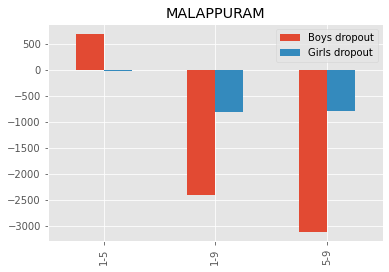

In [80]:
plt.style.use('ggplot')
mapML.plot.bar()
plt.title("MALAPPURAM")

#### Conclusion: From the above analysis we can say that more students are joining the schools especially from class 5th to 9th.

#### Tamil Nadu

In [81]:
school_student.loc[school_student["STATNAME_x"] == "TAMIL NADU"]

,STATNAME_x,DISTNAME_x,C1_B,C2_B,C3_B,C4_B,C5_B,C6_B,C7_B,C8_B,C9_B,C1_G,C2_G,C3_G,C4_G,C5_G,C6_G,C7_G,C8_G,C9_G,C15A,C68A,C1_BD,C2_BD,C3_BD,C4_BD,C5_BD,C6_BD,C7_BD,C8_BD,C1_GD,C2_GD,C3_GD,C4_GD,C5_GD,C6_GD,C7_GD,C8_GD,C1_BR,C2_BR,...,TCHSTF4,TCHSTF5,TCHSTF6,TCHSTF7,TCHOBCM1,TCHOBCM2,TCHOBCM3,TCHOBCM4,TCHOBCM5,TCHOBCM6,TCHOBCM7,TCHOBCF1,TCHOBCF2,TCHOBCF3,TCHOBCF4,TCHOBCF5,TCHOBCF6,TCHOBCF7,TCH_TRNRM1,TCH_TRNRM2,TCH_TRNRM3,TCH_TRNRM4,TCH_TRNRM5,TCH_TRNRM6,TCH_TRNRM7,TCH_TRNRF1,TCH_TRNRF2,TCH_TRNRF3,TCH_TRNRF4,TCH_TRNRF5,TCH_TRNRF6,TCH_TRNRF7,PGRMTCH,PGRFTCH,GRMTCH,GRFTCH,PGCMTCH,PGCFTCH,PCMTCH,PCFTCH
DISTCD,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3301,TAMIL NADU,THIRUVALLUR,32730,32420,31765,31572,30652,30779,29679,29399,29381,31877,29733,30328,30339,28673,28905,28336,27882,27567,271364,141532,371,419,473,364,369,330,348,325,183,272,268,301,265,242,363,357,11,7,...,0,42,43,20,557,564,1125,2,1150,209,538,3892,2135,5947,10,1980,1834,921,602,493,8,1,294,3,354,2316,1558,22,6,652,6,696,3113,9222,3142,9392,358,385,375,417
3302,TAMIL NADU,CHENNAI,31513,31509,34069,32794,32246,33445,33738,32969,32708,30639,29330,34023,32434,31173,32590,32866,34189,32181,277929,157582,275,336,373,340,392,393,327,370,186,203,281,262,310,254,299,276,74,57,...,0,30,38,2,167,89,1239,1,1044,156,124,3890,1298,8857,0,2756,1813,633,62,47,12,1,163,7,49,1145,767,54,0,733,35,270,757,5359,763,5427,502,3435,532,3725
3303,TAMIL NADU,KANCHEEPURAM,33449,33801,34352,32987,31252,32046,31421,31413,31895,32612,32101,33191,32031,30291,30530,29284,29451,30496,279695,143022,286,277,358,385,477,379,394,392,167,181,249,301,295,296,311,255,28,20,...,0,16,36,10,450,521,876,3,1276,235,422,4471,2565,6286,5,2981,2254,1010,426,475,0,2,254,3,200,2346,1752,6,5,881,14,568,2460,8410,2476,8445,506,1929,537,2153
3304,TAMIL NADU,VELLORE,28932,28861,29458,29581,29738,31351,31117,31402,28765,27299,27783,28170,27723,28043,30157,29302,30293,28909,243788,142730,281,373,476,485,656,445,452,489,222,244,347,317,481,314,337,411,120,114,...,0,39,9,21,1119,935,895,1,2307,204,690,5400,2156,3075,1,2646,1217,762,1180,999,2,1,377,1,329,3377,2067,12,2,609,3,419,4875,8386,4877,8390,583,1106,590,1174
3305,TAMIL NADU,DHARMAPURI,11834,12420,13900,13814,13520,13311,14143,13460,13021,10704,10775,12075,12457,12746,12477,12910,13046,11307,106213,61169,108,142,219,240,239,223,253,232,74,117,153,148,152,186,197,199,0,0,...,1,32,3,17,614,747,837,4,1415,101,557,1842,1060,1651,27,1144,348,523,696,933,3,4,622,0,445,1293,1058,3,16,478,1,337,3849,4017,3852,4018,413,527,422,552
3306,TAMIL NADU,TIRUVANNAMALAI,18847,19457,21219,21266,20803,20538,19470,19347,19536,17219,18074,19651,20177,19843,19585,18132,18884,18829,192066,105859,246,357,380,416,468,362,348,389,167,222,236,296,310,251,282,277,13,18,...,5,24,18,13,1019,861,560,0,1716,132,843,3000,1213,1583,26,1513,644,811,1139,917,0,0,378,0,379,2160,1195,0,37,425,0,381,5031,5938,5035,5948,449,498,456,498
3307,TAMIL NADU,VILUPPURAM,26214,26754,28360,29089,30238,27293,26787,27293,26553,24443,24937,25157,27185,28307,25972,25490,26276,25446,228040,122735,356,415,499,566,606,484,577,606,220,313,398,375,408,371,484,580,3,0,...,5,19,9,8,1437,1281,627,18,2167,204,876,3738,1848,2125,91,2449,732,980,1566,1453,6,5,513,0,449,2728,1840,14,82,642,0,519,6006,7380,6007,7383,724,907,727,909
3308,TAMIL NADU,SALEM,26027,26704,27790,27854,29151,28177,26757,30664,28238,23894,23985,24574,25953,26483,26020,25027,28840,26688,236705,135154,276,327,405,441,471,488,590,463,176,201,254,263,294,384,434,412,11,8,...,3,39,22,18,687,760,995,1,2086,240,551,4048,2090,3415,73,2995,1388,750,854,862,12,0,879,7,478,2710,1866,15,69,1530,3,636,4375,8780,4393,8899,388,541,388,542
3309,TAMIL NADU,NAMAKKAL,12176,12283,12560,12529,12720,12321,12631,13016,13691,10989,11173,11330,11194,11497,11099,11136,11397,11783,103191,57752,201,238,277,324,306,327,388,429,131,144,166,181,213,245,291,340,10,12,...,5,25,26,12,433,358,749,0,1553,175,230,1947,903,2124,8,2093,1020,435,518,403,0,0,5

In [82]:
TN_df = school_student.loc[school_student["STATNAME_x"] == "TAMIL NADU"]

In [84]:
TN_df.describe()

,C1_B,C2_B,C3_B,C4_B,C5_B,C6_B,C7_B,C8_B,C9_B,C1_G,C2_G,C3_G,C4_G,C5_G,C6_G,C7_G,C8_G,C9_G,C15A,C68A,C1_BD,C2_BD,C3_BD,C4_BD,C5_BD,C6_BD,C7_BD,C8_BD,C1_GD,C2_GD,C3_GD,C4_GD,C5_GD,C6_GD,C7_GD,C8_GD,C1_BR,C2_BR,C3_BR,C4_BR,...,TCHSTF4,TCHSTF5,TCHSTF6,TCHSTF7,TCHOBCM1,TCHOBCM2,TCHOBCM3,TCHOBCM4,TCHOBCM5,TCHOBCM6,TCHOBCM7,TCHOBCF1,TCHOBCF2,TCHOBCF3,TCHOBCF4,TCHOBCF5,TCHOBCF6,TCHOBCF7,TCH_TRNRM1,TCH_TRNRM2,TCH_TRNRM3,TCH_TRNRM4,TCH_TRNRM5,TCH_TRNRM6,TCH_TRNRM7,TCH_TRNRF1,TCH_TRNRF2,TCH_TRNRF3,TCH_TRNRF4,TCH_TRNRF5,TCH_TRNRF6,TCH_TRNRF7,PGRMTCH,PGRFTCH,GRMTCH,GRFTCH,PGCMTCH,PGCFTCH,PCMTCH,PCFTCH
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,...,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,18611.133333,18896.733333,19824.466667,19716.366667,19783.400000,19830.833333,19251.733333,20033.100000,19572.166667,17548.500000,17676.700000,18766.800000,18720.133333,18655.033333,18928.133333,18304.833333,19081.833333,18668.166667,165065.200000,91644.766667,241.333333,277.633333,326.666667,341.100000,396.066667,345.200000,358.533333,393.166667,153.800000,185.066667,218.566667,223.333333,265.766667,251.500000,282.533333,310.866667,12.400000,11.333333,9.400000,8.233333,...,0.700000,16.966667,11.50000,6.900000,583.400000,536.266667,616.733333,2.833333,1318.333333,132.100000,416.600000,3113.233333,1504.100000,2804.900000,14.866667,1960.200000,936.333333,647.433333,638.666667,580.966667,5.600000,2.133333,392.600000,2.833333,255.166667,2028.800000,1314.766667,18.666667,12.800000,707.333333,7.066667,411.50000,2659.700000,5337.80000,2670.466667,5380.566667,306.633333,650.433333,313.900000,683.566667
std,8764.101361,8815.242849,8901.504339,8682.382608,8535.205513,8527.583342,8644.681047,8787.654359,8555.228271,8431.405858,8335.764227,8518.601615,8332.392490,8179.119072,8133.408378,8050.637731,8254.042270,8497.227171,75428.930035,40765.441321,99.165252,103.138168,111.709084,112.577437,152.941037,104.521702,113.331900,139.776196,62.345201,69.414265,81.066462,76.020566,105.877836,77.628981,95.855399,130.295350,25.108866,23.411364,20.503322,17.707749,...,1.578956,12.363694,12.75431,6.271721,278.067791,240.547785,383.426110,4.654129,436.343058,70.300022,184.511396,1212.691810,640.252124,2267.851761,21.453612,808.538332,585.493210,226.401335,309.351751,283.314798,11.406592,3.411273,176.960077,3.860350,108.400625,724.411933,535.062399,24.252029,19.527876,349.134332,11.602418,151.58331,1281.785747,2429.22216,1283.088857,2469.143027,159.889506,655.881333,163.274753,715.181370
min,4952.000000,4825.000000,4812.000000,5031.000000,5212.000000,5205.000000,5306.000000,5679.000000,5596.000000,4823.000000,4744.000000,4691.000000,4729.000000,5094.000000,5100.000000,5132.000000,5506.000000,5525.000000,44678.000000,27304.000000,70.000000,62.000000,91.000000,99.000000,107.000000,95.000000,133.000000,116.000000,63.000000,51.000000,46.000000,78.000000,59.000000,77.000000,124.000000,109.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,127.000000,89.000000,139.000000,0.000000,410.000000,11.000000,124.000000,854.000000,350.000000,607.000000,0.000000,598.000000,238.000000,287.000000,62.000000,47.000000,0.000000,0.000000,72.000000,0.000000,49.000000,639.000000,348.000000,0.000000,0.000000,160.000000,0.000000,154.00000,757.000000,2073.00000,763.00

In [85]:
TN_df.set_index("DISTNAME_x",inplace=True)

In [86]:
print(TN_df)

                 STATNAME_x   C1_B   C2_B  ...  PGCFTCH  PCMTCH  PCFTCH
DISTNAME_x                                 ...                         
THIRUVALLUR      TAMIL NADU  32730  32420  ...      385     375     417
CHENNAI          TAMIL NADU  31513  31509  ...     3435     532    3725
KANCHEEPURAM     TAMIL NADU  33449  33801  ...     1929     537    2153
VELLORE          TAMIL NADU  28932  28861  ...     1106     590    1174
DHARMAPURI       TAMIL NADU  11834  12420  ...      527     422     552
TIRUVANNAMALAI   TAMIL NADU  18847  19457  ...      498     456     498
VILUPPURAM       TAMIL NADU  26214  26754  ...      907     727     909
SALEM            TAMIL NADU  26027  26704  ...      541     388     542
NAMAKKAL         TAMIL NADU  12176  12283  ...      577     277     618
ERODE            TAMIL NADU  18797  18883  ...      336     280     350
THE NILGIRIS     TAMIL NADU   4952   4825  ...       92      77      93
COIMBATORE       TAMIL NADU  38451  39521  ...     1091     506 

In [87]:
TN_dropout = pd.DataFrame({})

In [90]:
TN_dropout['B_C1C5'] = TN_df['C1_B'] - TN_df['C5_B']
TN_dropout['B_C1C9'] = TN_df['C1_B'] - TN_df['C9_B']
TN_dropout['B_C5C9'] = TN_df['C5_B'] - TN_df['C9_B']
TN_dropout['G_C1C5'] = TN_df['C1_G'] - TN_df['C5_G']
TN_dropout['G_C1C9'] = TN_df['C1_G'] - TN_df['C9_G']
TN_dropout['G_C5C9'] = TN_df['C5_G'] - TN_df['C9_G']

In [91]:
boys_do = list(dict(TN_dropout.loc['CHENNAI'][['B_C1C5','B_C1C9','B_C5C9']]).values())

In [89]:
girls_do = list(dict(TN_dropout.loc['CHENNAI'][['G_C1C5','G_C1C9','G_C5C9']]).values())

In [92]:
print(boys_do,girls_do)

[-733, -1195, -462] [-534, -1542, -1008]


In [93]:
index = ["1-5","1-9","5-9"]

In [94]:
mapTN = pd.DataFrame({'Boys dropout':boys_do, 'Girls dropout':girls_do},index=index)

Text(0.5, 1.0, 'CHENNAI')

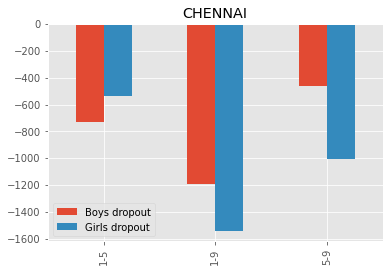

In [96]:
plt.style.use('ggplot')
mapTN.plot.bar()
plt.title("CHENNAI")

#### Conclusion: From the above analysis we can say that more students are joining the schools especially from class 1 to 9th.

#### Maharshtra

In [97]:
school_student.loc[school_student["STATNAME_x"] == "MAHARASHTRA"]

,STATNAME_x,DISTNAME_x,C1_B,C2_B,C3_B,C4_B,C5_B,C6_B,C7_B,C8_B,C9_B,C1_G,C2_G,C3_G,C4_G,C5_G,C6_G,C7_G,C8_G,C9_G,C15A,C68A,C1_BD,C2_BD,C3_BD,C4_BD,C5_BD,C6_BD,C7_BD,C8_BD,C1_GD,C2_GD,C3_GD,C4_GD,C5_GD,C6_GD,C7_GD,C8_GD,C1_BR,C2_BR,...,TCHSTF4,TCHSTF5,TCHSTF6,TCHSTF7,TCHOBCM1,TCHOBCM2,TCHOBCM3,TCHOBCM4,TCHOBCM5,TCHOBCM6,TCHOBCM7,TCHOBCF1,TCHOBCF2,TCHOBCF3,TCHOBCF4,TCHOBCF5,TCHOBCF6,TCHOBCF7,TCH_TRNRM1,TCH_TRNRM2,TCH_TRNRM3,TCH_TRNRM4,TCH_TRNRM5,TCH_TRNRM6,TCH_TRNRM7,TCH_TRNRF1,TCH_TRNRF2,TCH_TRNRF3,TCH_TRNRF4,TCH_TRNRF5,TCH_TRNRF6,TCH_TRNRF7,PGRMTCH,PGRFTCH,GRMTCH,GRFTCH,PGCMTCH,PGCFTCH,PCMTCH,PCFTCH
DISTCD,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2701,MAHARASHTRA,NANDURBAR,18140,18896,17510,16973,16921,17005,16859,15835,14646,16542,17405,16513,15976,15684,15588,15222,14245,12779,154167,76988,201,211,199,190,131,87,82,62,126,148,129,139,92,65,78,73,0,0,...,0,31,88,65,748,383,456,0,249,432,402,447,228,132,0,77,122,95,51,6,0,0,0,1,5,14,2,0,0,0,0,1,3411,1133,3476,1143,142,46,144,47
2702,MAHARASHTRA,DHULE,23496,23211,21976,22003,22312,22382,22899,21491,20715,20659,20284,19518,19486,19344,19267,19197,18060,16488,187003,96108,538,393,407,442,406,352,382,313,286,241,247,275,208,212,270,229,412,261,...,0,30,47,15,993,575,1100,0,321,906,193,796,453,224,0,186,205,64,150,20,44,0,0,32,3,59,13,9,0,0,7,2,2606,1483,2630,1491,39,31,41,31
2703,MAHARASHTRA,JALGAON,44897,43935,42729,42633,43316,44315,43663,44672,42625,36524,35634,35218,35585,35942,36370,36680,36233,32929,343219,189148,526,633,614,642,575,470,523,476,281,311,307,342,272,285,302,309,0,0,...,0,1,97,6,1711,1326,1421,4,61,1988,150,1115,862,440,8,9,699,61,105,79,13,0,0,38,3,46,14,1,0,0,7,0,5758,2657,5758,2657,40,14,40,14
2704,MAHARASHTRA,BULDANA,26310,25901,25440,25471,24595,25234,26109,26584,25777,21657,21685,21783,21627,21067,21540,22514,22926,21302,206434,116803,505,647,598,667,465,557,508,507,321,393,370,384,315,348,348,323,0,0,...,0,3,20,6,1362,2088,1530,0,90,921,189,603,762,327,4,23,247,30,177,253,37,0,5,40,7,67,73,5,0,0,6,0,5976,1791,5982,1791,135,61,137,63
2705,MAHARASHTRA,AKOLA,16151,15810,15580,15161,15174,15517,16587,17083,17579,14384,14246,14202,13823,13799,14304,15135,15479,15522,129828,75004,317,410,468,521,538,488,547,526,227,283,354,340,349,355,420,389,10,6,...,0,35,6,20,659,889,26,3,880,58,382,597,911,56,3,287,147,164,134,213,0,0,52,4,40,75,135,0,0,11,0,7,2673,1745,2686,1746,59,32,60,32
2706,MAHARASHTRA,WASHIM,11974,11707,11636,11405,11489,11496,11990,12574,12649,9991,9982,9913,9974,10060,10395,10890,11239,10751,93590,53325,261,312,313,389,281,252,296,231,147,196,231,207,181,176,195,196,1,1,...,0,2,12,3,569,858,847,0,42,361,64,299,348,189,0,6,116,8,60,75,18,0,0,1,1,14,16,1,0,0,0,0,2519,918,2527,919,26,10,26,10
2707,MAHARASHTRA,AMRAVATI,23823,23225,23427,23133,23345,23359,24551,25254,25450,22220,21451,21853,21638,21729,21482,22912,23072,22889,194802,113505,492,556,567,586,503,460,492,443,360,399,409,407,341,301,326,278,0,0,...,0,14,56,22,1065,1621,1309,0,191,940,468,1155,1634,729,0,59,766,186,87,127,23,0,2,11,7,87,111,9,0,0,14,5,4474,3291,4486,3301,42,23,42,23
2708,MAHARASHTRA,WARDHA,9603,9907,9839,9644,9856,9841,9922,10527,11079,8861,9064,9020,8803,8832,9133,9317,9557,9693,82403,48150,245,361,397,403,365,350,354,347,180,240,248,271,205,237,248,284,0,0,...,0,1,35,11,670,814,822,4,28,536,190,695,650,408,1,18,452,53,49,62,18,0,4,48,7,44,40,4,0,1,18,2,1939,1319,1939,1319,9,6,9,6
2709,MAHARASHTRA,NAGPUR,41078,40106,41098,40262,40554,40014,41468,40818,41165,37456,36336,37826,36920,37239,36918,37391,36470,36733,337402,188746,679,821,810,864,798,758,834,839,452,533,557,545,558,545,628,753,0,0,...,0,27,151,39,1372,1454,1781,1,153,1367,301,1699,2620,1312,2,185,1388,346,85,95,1,0,0,19,10,70,119,2,0,1,20,5,3431,3848,3435,3855,14,72,16,72


In [98]:
MH_df = school_student.loc[school_student["STATNAME_x"] == "MAHARASHTRA"]

In [99]:
MH_df.describe()

,C1_B,C2_B,C3_B,C4_B,C5_B,C6_B,C7_B,C8_B,C9_B,C1_G,C2_G,C3_G,C4_G,C5_G,C6_G,C7_G,C8_G,C9_G,C15A,C68A,C1_BD,C2_BD,C3_BD,C4_BD,C5_BD,C6_BD,C7_BD,C8_BD,C1_GD,C2_GD,C3_GD,C4_GD,C5_GD,C6_GD,C7_GD,C8_GD,C1_BR,C2_BR,C3_BR,C4_BR,...,TCHSTF4,TCHSTF5,TCHSTF6,TCHSTF7,TCHOBCM1,TCHOBCM2,TCHOBCM3,TCHOBCM4,TCHOBCM5,TCHOBCM6,TCHOBCM7,TCHOBCF1,TCHOBCF2,TCHOBCF3,TCHOBCF4,TCHOBCF5,TCHOBCF6,TCHOBCF7,TCH_TRNRM1,TCH_TRNRM2,TCH_TRNRM3,TCH_TRNRM4,TCH_TRNRM5,TCH_TRNRM6,TCH_TRNRM7,TCH_TRNRF1,TCH_TRNRF2,TCH_TRNRF3,TCH_TRNRF4,TCH_TRNRF5,TCH_TRNRF6,TCH_TRNRF7,PGRMTCH,PGRFTCH,GRMTCH,GRFTCH,PGCMTCH,PGCFTCH,PCMTCH,PCFTCH
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,...,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,29955.944444,29982.638889,29535.666667,29152.333333,29007.416667,29124.805556,29464.055556,29770.055556,29380.972222,26136.166667,26231.888889,26200.972222,25886.388889,25746.944444,25706.416667,26126.555556,26019.305556,24622.472222,245278.333333,133967.416667,521.805556,589.472222,617.166667,661.527778,581.666667,565.111111,586.555556,521.611111,329.500000,376.805556,411.861111,433.000000,398.472222,413.222222,433.416667,411.166667,12.777778,8.583333,9.222222,8.333333,...,0.194444,7.944444,55.194444,16.166667,919.527778,1145.027778,801.527778,1.805556,140.611111,681.222222,225.222222,686.250000,916.916667,312.833333,1.527778,51.333333,356.777778,95.194444,170.166667,193.111111,28.027778,0.055556,6.194444,41.166667,18.527778,108.611111,139.305556,11.222222,0.027778,1.555556,16.166667,6.916667,4507.972222,2684.527778,4523.000000,2688.500000,75.500000,46.194444,76.777778,47.222222
std,21849.979209,22138.424083,22154.309117,21661.376556,20466.847178,20320.049433,20015.331364,20542.056468,20804.078058,19070.065436,19420.006736,19494.155065,19080.493938,17700.154924,17379.122124,17111.433881,17385.644263,16968.009573,173541.748745,92566.029196,321.988626,337.353523,362.275389,385.303034,310.101458,327.021430,332.981977,307.459384,190.787915,208.498828,248.056348,265.297784,227.389972,272.402760,266.442958,284.877568,68.624490,43.670438,46.912143,40.929207,...,0.624246,10.345308,48.102759,17.105555,432.529602,482.095396,433.180100,3.663093,170.003408,389.260920,129.721925,417.219119,655.298596,269.411369,2.049197,65.678002,289.104540,99.476291,180.232627,176.579044,38.897290,0.333333,15.087970,45.038714,22.522986,151.648706,188.545837,16.332459,0.166667,3.974522,17.465885,9.705300,1918.541149,1700.118475,1922.165059,1701.031191,70.411647,45.949550,72.472699,47.721879
min,4564.000000,4980.000000,4940.000000,5089.000000,5514.000000,5544.000000,6178.000000,6276.000000,6821.000000,4252.000000,4615.000000,4504.000000,4690.000000,5111.000000,5023.000000,5684.000000,5788.000000,5985.000000,44175.000000,29009.000000,64.000000,85.000000,107.000000,105.000000,131.000000,87.000000,82.000000,62.000000,21.000000,30.000000,29.000000,50.000000,92.000000,65.000000,78.000000,73.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,279.000000,352.000000,279.000000,352.000000,1.000000,0.0

In [100]:
MH_df.set_index("DISTNAME_x",inplace=True)

In [101]:
print(MH_df)

                           STATNAME_x   C1_B   C2_B  ...  PGCFTCH  PCMTCH  PCFTCH
DISTNAME_x                                           ...                         
NANDURBAR                 MAHARASHTRA  18140  18896  ...       46     144      47
DHULE                     MAHARASHTRA  23496  23211  ...       31      41      31
JALGAON                   MAHARASHTRA  44897  43935  ...       14      40      14
BULDANA                   MAHARASHTRA  26310  25901  ...       61     137      63
AKOLA                     MAHARASHTRA  16151  15810  ...       32      60      32
WASHIM                    MAHARASHTRA  11974  11707  ...       10      26      10
AMRAVATI                  MAHARASHTRA  23823  23225  ...       23      42      23
WARDHA                    MAHARASHTRA   9603   9907  ...        6       9       6
NAGPUR                    MAHARASHTRA  41078  40106  ...       72      16      72
BHANDARA                  MAHARASHTRA   8946   8692  ...       41      69      41
GONDIYA         

In [102]:
MH_dropout = pd.DataFrame({})

In [103]:
MH_dropout['B_C1C5'] = MH_df['C1_B'] - MH_df['C5_B']
MH_dropout['B_C1C9'] = MH_df['C1_B'] - MH_df['C9_B']
MH_dropout['B_C5C9'] = MH_df['C5_B'] - MH_df['C9_B']
MH_dropout['G_C1C5'] = MH_df['C1_G'] - MH_df['C5_G']
MH_dropout['G_C1C9'] = MH_df['C1_G'] - MH_df['C9_G']
MH_dropout['G_C5C9'] = MH_df['C5_G'] - MH_df['C9_G']

In [104]:
boys_do = list(dict(MH_dropout.loc['PUNE'][['B_C1C5','B_C1C9','B_C5C9']]).values())

In [105]:
girls_do = list(dict(MH_dropout.loc['PUNE'][['G_C1C5','G_C1C9','G_C5C9']]).values())

In [106]:
print(boys_do,girls_do)

[6810, 9391, 2581] [5815, 13184, 7369]


In [107]:
index = ["1-5","1-9","5-9"]

In [108]:
mapPU = pd.DataFrame({'Boys dropout':boys_do, 'Girls dropout':girls_do},index=index)

Text(0.5, 1.0, 'Pune')

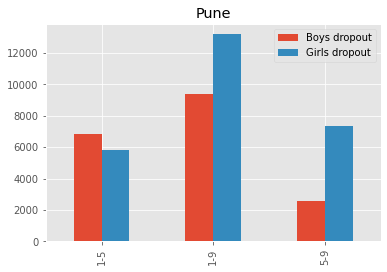

In [109]:
plt.style.use('ggplot')
mapPU.plot.bar()
plt.title("Pune")

#### Conclusion: From the above analysis we can say that most dropout students are from Class 1 to Class 9th Standard.

### 3. In the udise dataset, we had created a correlation between girls dropout and infrastructure of schools for the state of West Bengal. Complete the same for the following states: Rajasthan,Madhya Pradesh, Karnataka, Tamil Nadu, Kerala and Maharashtra. [Hint: Refer to West Bengal Analysis on udise dataset]

#### Madhya Pradesh

In [110]:
MP_dropout['gtoilet'] = MP_df['SGTOILTOT']

In [111]:
MP_dropout['G_C1C9'].corr(MP_dropout['gtoilet'])

0.02171708858099818

In [112]:
gdcause = MP_df[['SGTOILTOT','SWATTOT','SCLSTOT',
                 'STCHTOT','ROADTOT','SBNDRTOT']]

In [113]:
gdcause['GDROPOUT'] = MP_dropout['G_C1C9']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [114]:
print(gdcause)

             SGTOILTOT  SWATTOT  SCLSTOT  STCHTOT  ROADTOT  SBNDRTOT  GDROPOUT
DISTNAME_x                                                                    
SHEOPUR           1299     1425       41      222     1322       673      3581
MORENA            3393     3234       22      639     3158      1750      8567
BHIND             3031     3140      184      497     2882      1491      3990
GWALIOR           3206     3340       24      189     3033      2189      2883
DATIA             1503     1519        8      154     1418       648     -1272
SHIVPURI          3379     3491       35      447     3092      2002      4366
GUNA              2734     2519       93      292     2549      1009      4189
TIKAMGARH         2606     2718      123      159     2568      1327       848
CHHATARPUR        3428     3454       92      370     3244      1828       999
PANNA             2533     2664      103      367     2181      1078       448
SAGAR             3737     3606       73      551   

In [116]:
import seaborn as sns

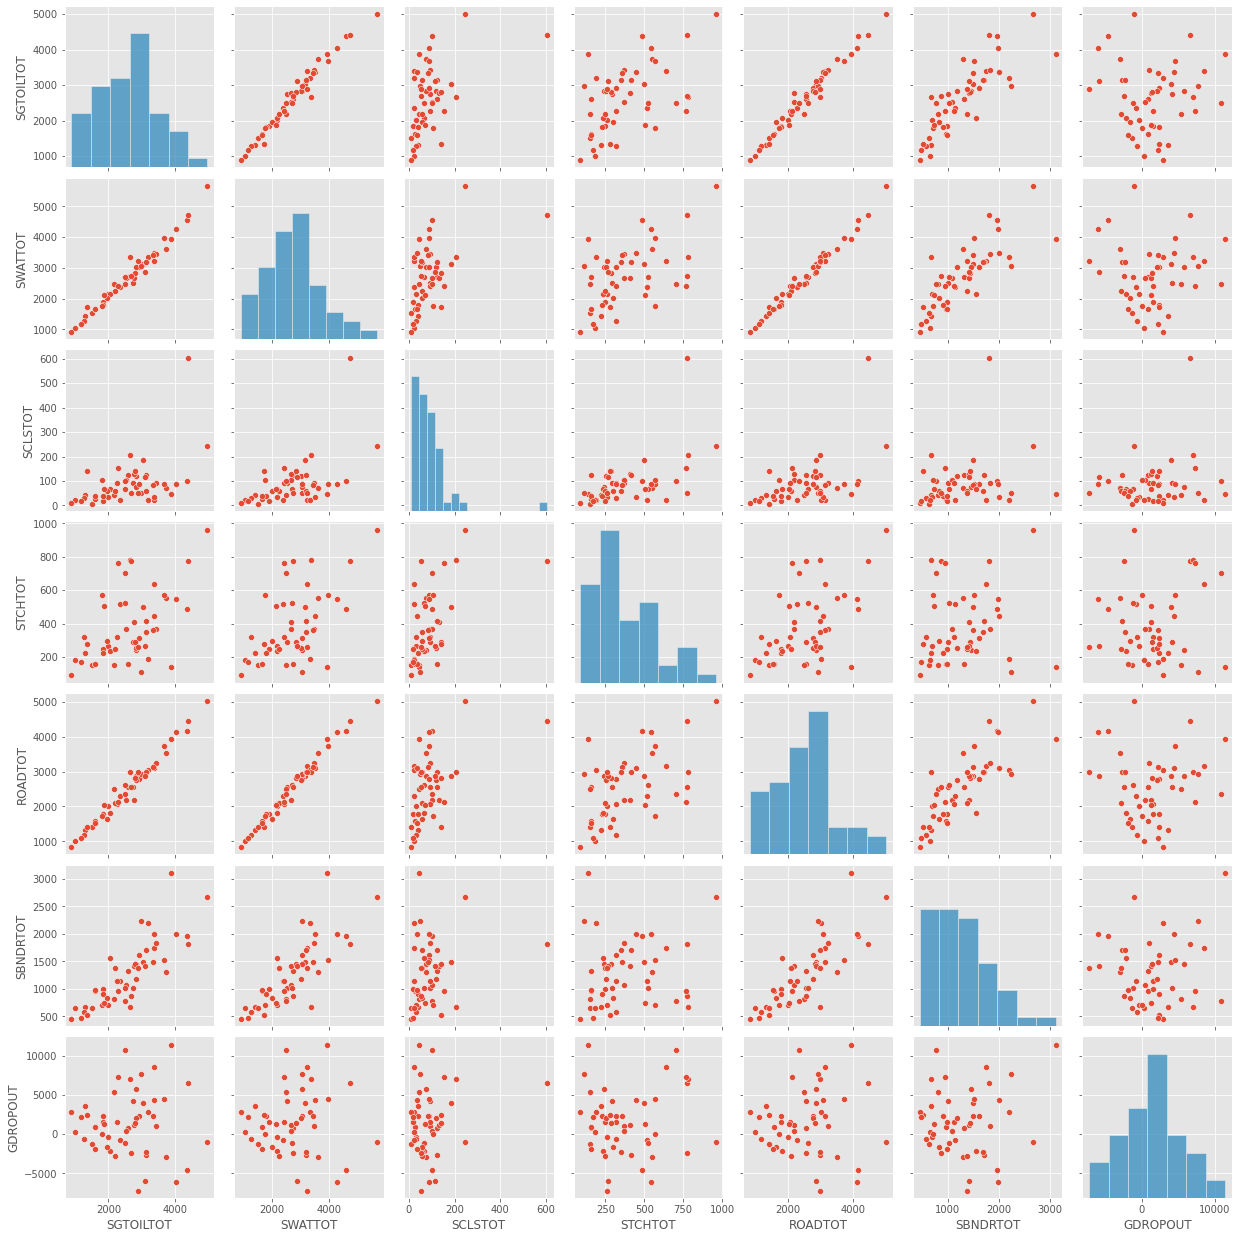

In [117]:
sns.pairplot(gdcause)

#### Conclusion: Above plot shows there are 4 feature showing positive correlation.

#### Rajasthan

In [141]:
RJ_dropout['gtoilet'] = RJ_df['SGTOILTOT']

In [143]:
RJ_dropout['G_C1C9'].corr(RJ_dropout['gtoilet'])

0.7911454578910648

In [145]:
gdcause = RJ_df[['SGTOILTOT','SWATTOT','SCLSTOT',
                 'STCHTOT','ROADTOT','SBNDRTOT']]

In [146]:
gdcause['GDROPOUT'] = RJ_dropout['G_C1C9']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [147]:
print(gdcause)

        SGTOILTOT  SWATTOT  SCLSTOT  STCHTOT  ROADTOT  SBNDRTOT  GDROPOUT
DISTCD                                                                   
801          3088     3091       24      327     2594      2881      4037
802          2117     2112       20      161     1889      2010      4272
803          3249     3308       34      541     2656      2805     14093
804          2590     2593       31      206     2185      2504      7963
805          2887     2887       30       70     2491      2727      3314
806          5135     4884       99      348     4171      4544     11486
807          3147     2961       64      221     2517      2843      7119
808          1801     1640       37      219     1550      1636      7898
809          2199     1992       46      138     1698      1756      7553
810          2002     1926       55       51     1642      1819      4382
811          2553     2497       54      189     2117      2133      2826
812          8872     8856       97   

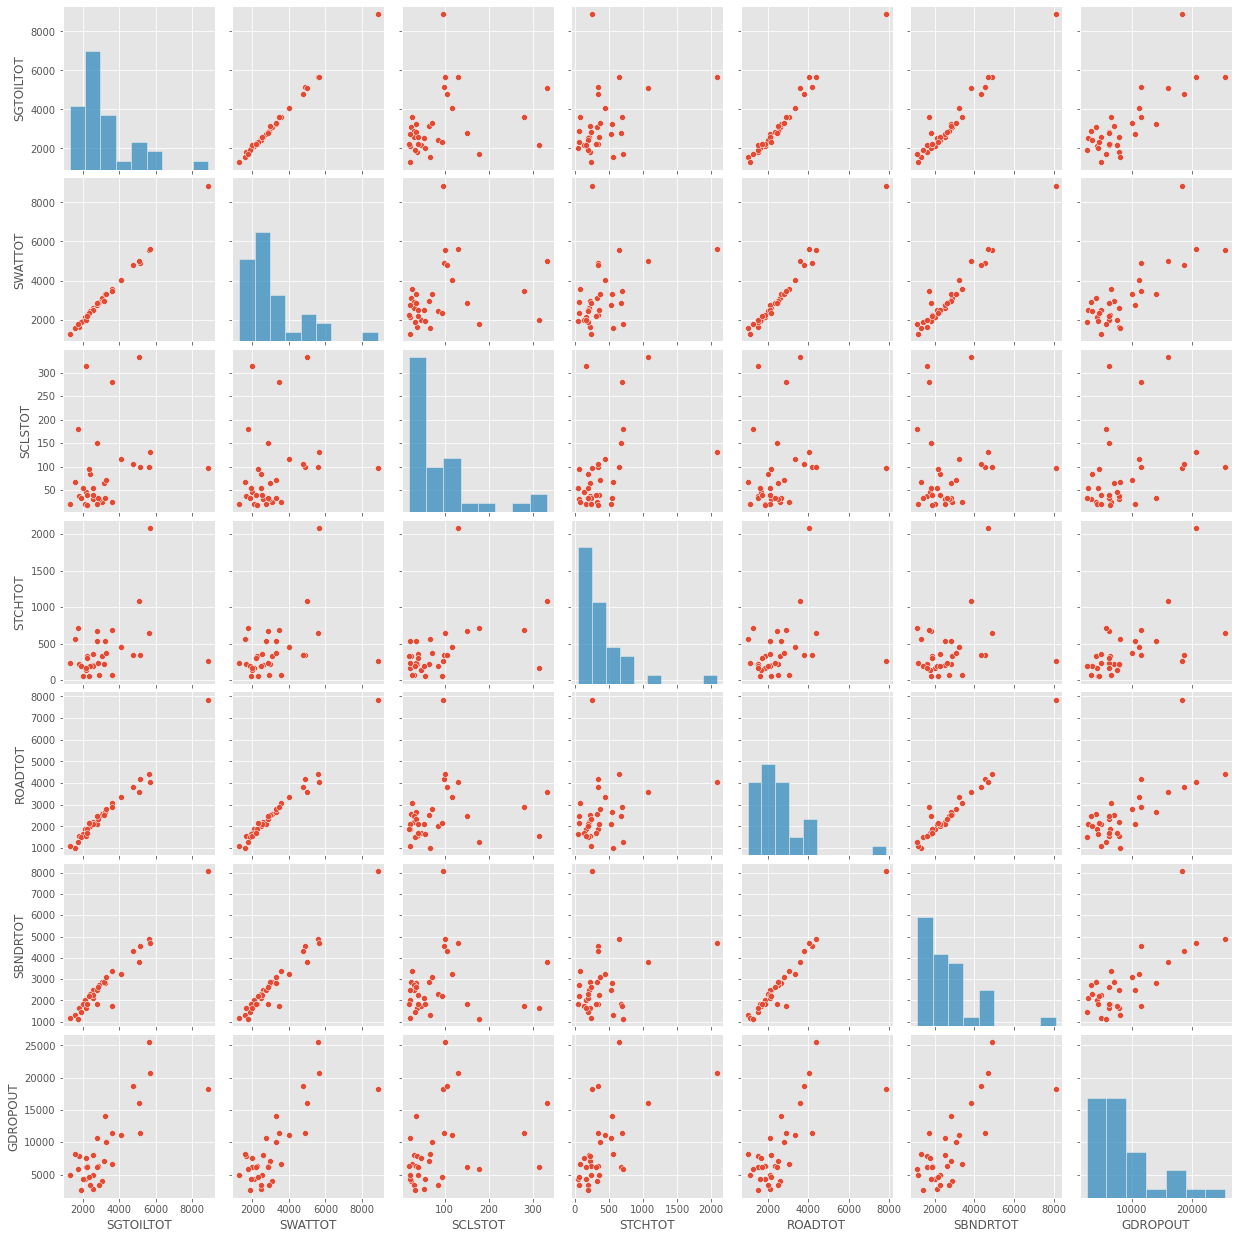

In [148]:
sns.pairplot(gdcause)

#### Conclusion: Above plot shows there are 6 feature showing positive correlation.

#### Karnatak

In [124]:
KR_dropout['gtoilet'] = KR_df['SGTOILTOT']

In [125]:
KR_dropout['G_C1C9'].corr(KR_dropout['gtoilet'])

0.5131158315984622

In [127]:
gdcause = KR_df[['SGTOILTOT','SWATTOT','SCLSTOT',
                 'STCHTOT','ROADTOT','SBNDRTOT']]

In [128]:
gdcause['GDROPOUT'] = KR_dropout['G_C1C9']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [129]:
print(gdcause)

                      SGTOILTOT  SWATTOT  SCLSTOT  ...  ROADTOT  SBNDRTOT  GDROPOUT
DISTNAME_x                                         ...                             
BELGAUM                    1772     1820       60  ...     1701      1347      2693
BAGALKOT                   1726     1812       10  ...     1646      1466      4357
BIJAPUR (KARNATAKA)        2681     2757       50  ...     2438      1563     10309
GULBARGA                   2816     2905       46  ...     2630      1847      8977
BIDAR                      2113     2122       12  ...     1922      1426      4308
RAICHUR                    2002     2019       38  ...     1540      1396      8118
KOPPAL                     1258     1317       12  ...     1190      1084      4098
GADAG                       810      860        2  ...      811       754      1687
DHARWAD                    1121     1225       13  ...     1112       991      1883
UTTARA KANNADA             1063     1072       43  ...      947       862   

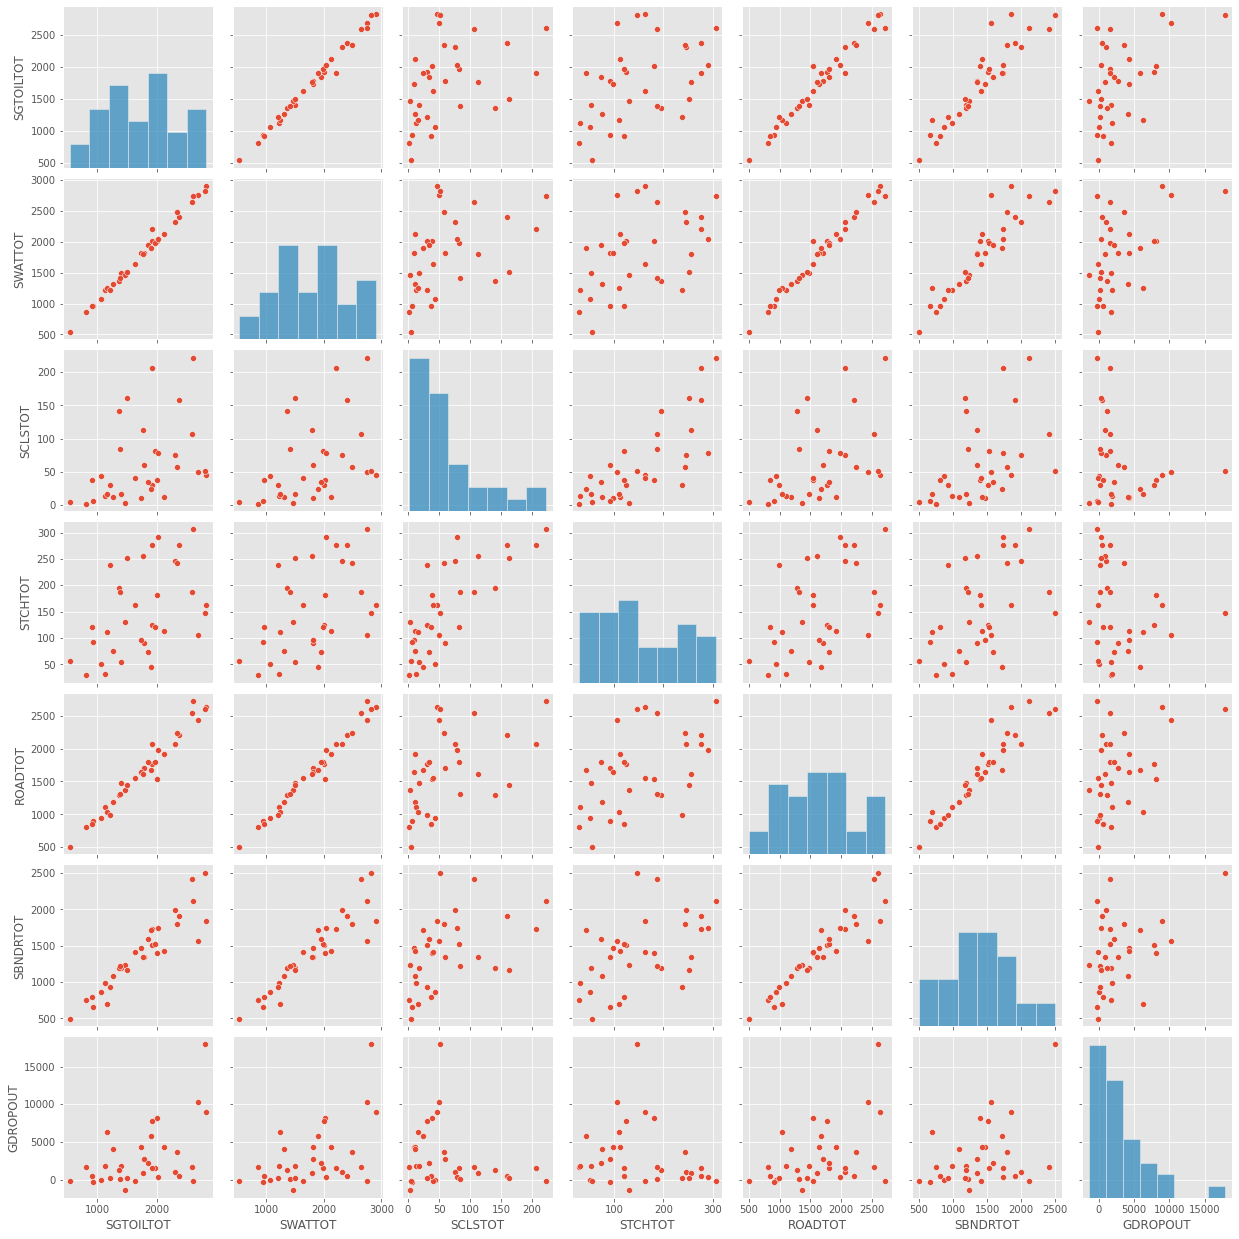

In [130]:
sns.pairplot(gdcause)

#### Conclusion: Above plot shows there are 4+ feature showing positive correlation.

#### Tamil Nadu

In [149]:
TN_dropout['gtoilet'] = TN_df['SGTOILTOT']

In [150]:
TN_dropout['G_C1C9'].corr(TN_dropout['gtoilet'])

-0.05049651661522218

In [151]:
gdcause = TN_df[['SGTOILTOT','SWATTOT','SCLSTOT',
                 'STCHTOT','ROADTOT','SBNDRTOT']]

In [152]:
gdcause['GDROPOUT'] = TN_dropout['G_C1C9']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [153]:
print(gdcause)

                 SGTOILTOT  SWATTOT  SCLSTOT  ...  ROADTOT  SBNDRTOT  GDROPOUT
DISTNAME_x                                    ...                             
THIRUVALLUR           2494     2510        0  ...     2470      2074      4310
CHENNAI               1410     1474        0  ...     1467      1418     -1542
KANCHEEPURAM          2516     2537        0  ...     2495      2134      2116
VELLORE               3234     3301        0  ...     3210      2618     -1610
DHARMAPURI            1590     1606        0  ...     1551      1338      -603
TIRUVANNAMALAI        2483     2510        0  ...     2477      1992     -1610
VILUPPURAM            2920     2957        0  ...     2955      2085     -1003
SALEM                 2373     2417        0  ...     2372      1712     -2794
NAMAKKAL              1351     1367        0  ...     1357      1094      -794
ERODE                 2384     2406        0  ...     2404      2028     -1629
THE NILGIRIS           719      723        0  ...   

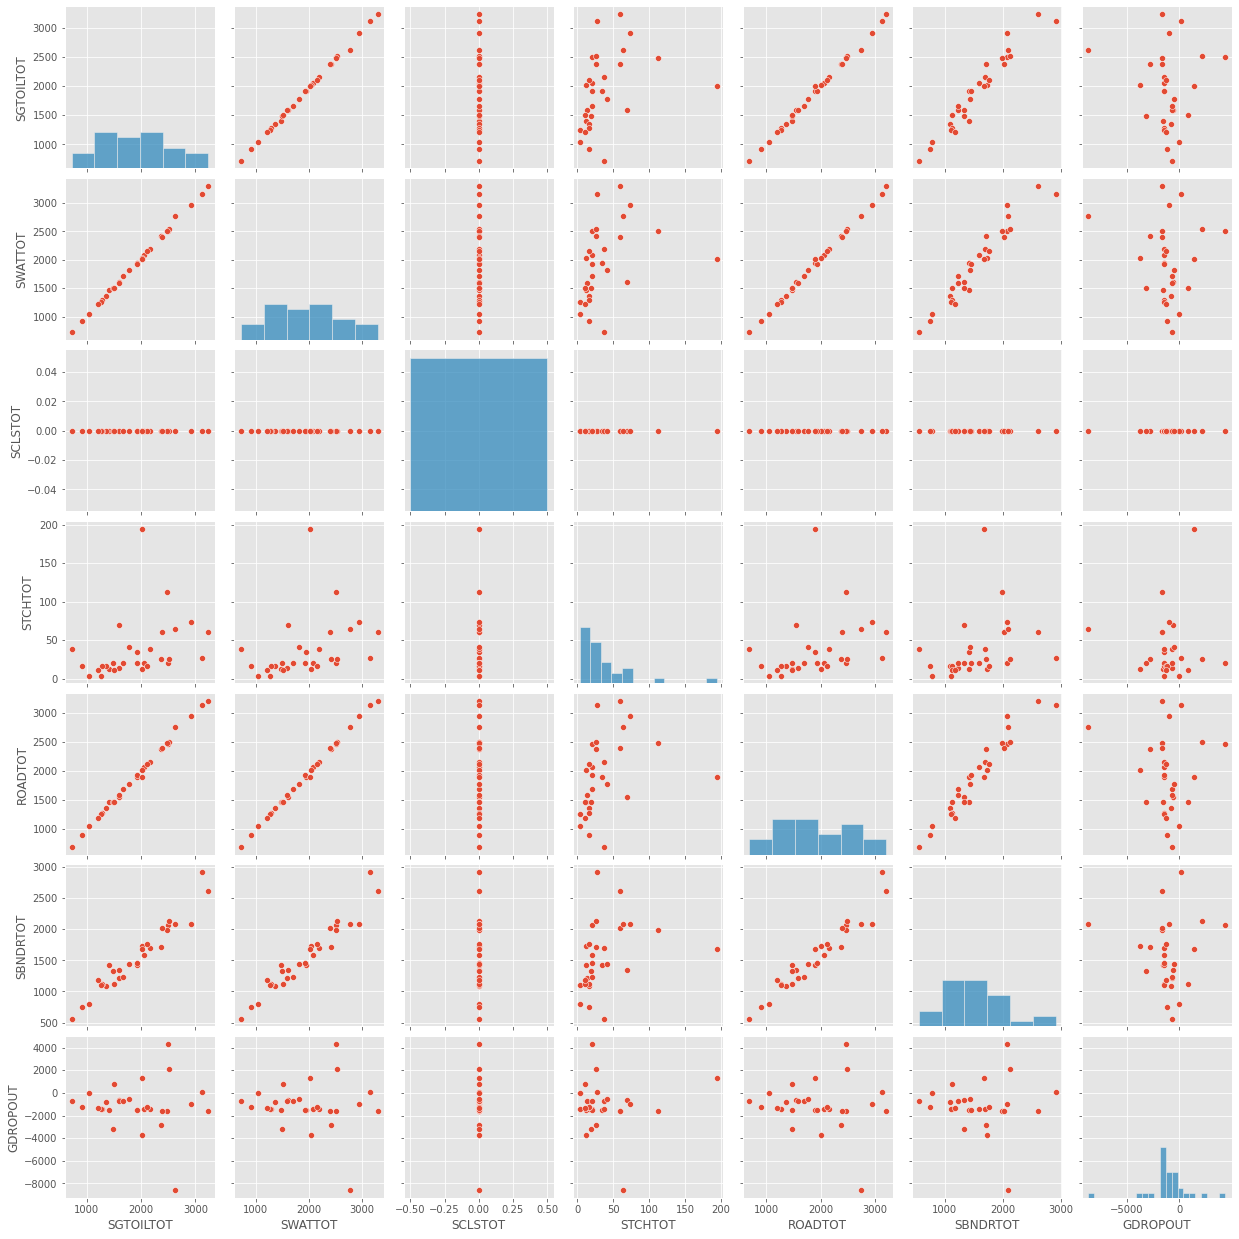

In [154]:
sns.pairplot(gdcause)

#### Conclusion: Above plot shows there are 4+ feature showing positive correlation.

#### Kerala

In [155]:
KE_dropout['gtoilet'] = KE_df['SGTOILTOT']

In [156]:
KE_dropout['G_C1C9'].corr(KE_dropout['gtoilet'])

-0.33856196315479087

In [157]:
gdcause = KE_df[['SGTOILTOT','SWATTOT','SCLSTOT',
                 'STCHTOT','ROADTOT','SBNDRTOT']]

In [158]:
gdcause['GDROPOUT'] = KE_dropout['G_C1C9']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [159]:
print(gdcause)

                    SGTOILTOT  SWATTOT  SCLSTOT  ...  ROADTOT  SBNDRTOT  GDROPOUT
DISTNAME_x                                       ...                             
KASARAGOD                 767      763       37  ...      757       606       770
KANNUR                   1504     1582       18  ...     1572      1086      -321
WAYANAD                   397      405       36  ...      356       272      -579
KOZHIKODE                1486     1602       22  ...     1524      1249     -1546
MALAPPURAM               1836     1846       36  ...     1825      1525      -814
PALAKKAD                 1186     1250       25  ...     1198      1134     -1840
THRISSUR                 1231     1248        6  ...     1226      1178     -1616
ERNAKULAM                1352     1370       14  ...     1348      1268     -1506
IDUKKI                    680      666       92  ...      620       449      -185
KOTTAYAM                 1125     1134        0  ...     1114      1002     -2505
ALAPPUZHA       

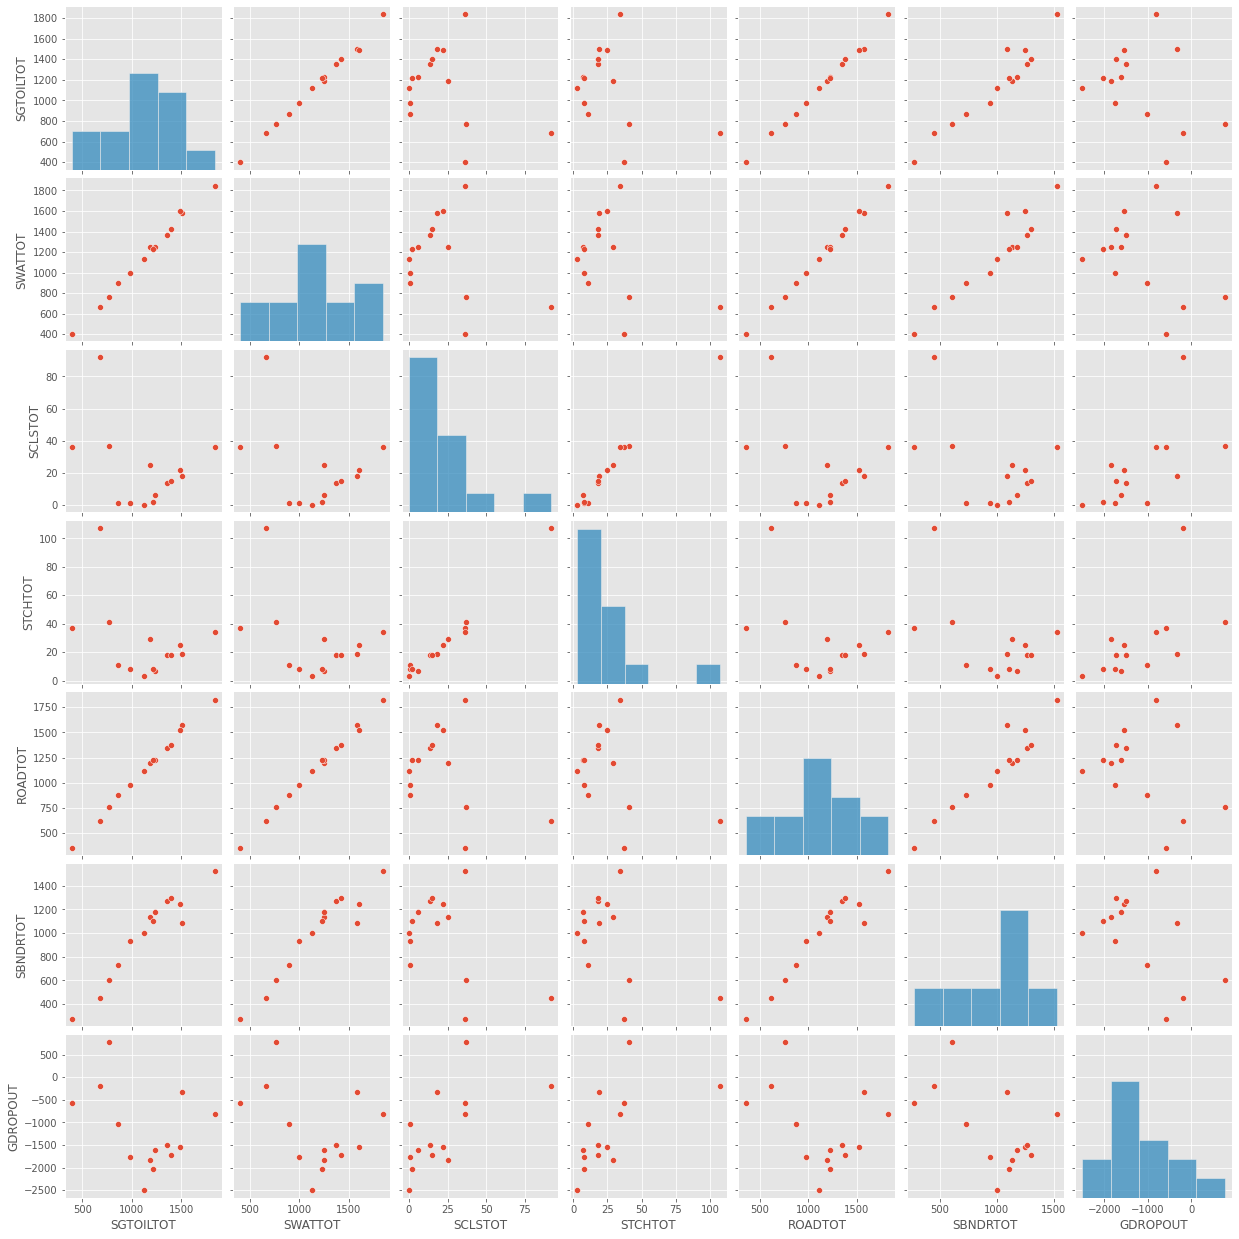

In [161]:
sns.pairplot(gdcause)

#### Conclusion: Above plot shows there are 4+ feature showing positive correlation.

#### Maharashtra

In [162]:
MH_dropout['gtoilet'] = MH_df['SGTOILTOT']

In [163]:
MH_dropout['G_C1C9'].corr(MH_dropout['gtoilet'])


0.22339945794449942

In [164]:
gdcause = MH_df[['SGTOILTOT','SWATTOT','SCLSTOT',
                 'STCHTOT','ROADTOT','SBNDRTOT']]

In [165]:
gdcause['GDROPOUT'] = MH_dropout['G_C1C9']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [166]:
print(gdcause)

                          SGTOILTOT  SWATTOT  ...  SBNDRTOT  GDROPOUT
DISTNAME_x                                    ...                    
NANDURBAR                      1961     1996  ...      1758      3763
DHULE                          1828     1940  ...      1669      4171
JALGAON                        3145     3264  ...      3006      3595
BULDANA                        2257     2317  ...      2106       355
AKOLA                          1502     1585  ...      1291     -1138
WASHIM                         1276     1282  ...      1048      -760
AMRAVATI                       2703     2802  ...      2480      -669
WARDHA                         1454     1463  ...      1340      -832
NAGPUR                         3936     3951  ...      3398       723
BHANDARA                       1259     1283  ...      1185     -1244
GONDIYA                        1609     1619  ...      1398     -1305
GADCHIROLI                     1904     2043  ...      1687       460
CHANDRAPUR          

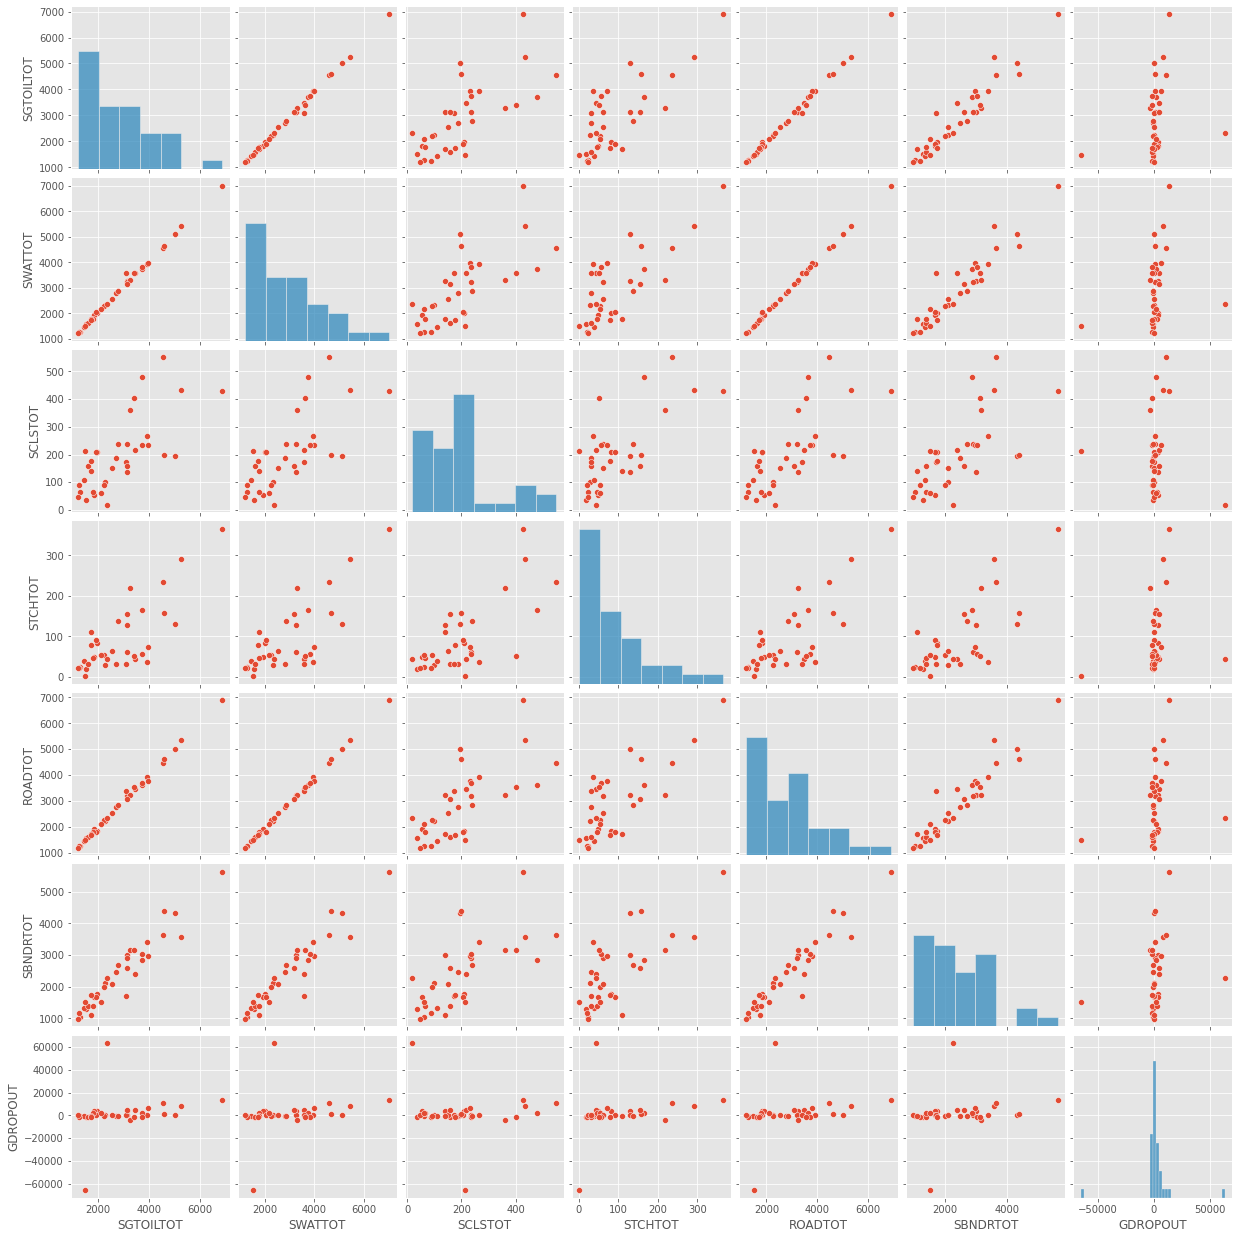

In [167]:
sns.pairplot(gdcause)

#### Conclusion: Above plot shows there are 4+ feature showing positive correlation.

### 4. In the school dataset for poor ranking in schools, we had seen that there is a direct correlation between reduced_lunch and school rating. Check if we can find any such correlation with any other indicator like pupil teacher ratio. [Hint: Refer to West Bengal Analysis on udise dataset)

In [168]:
school_data =  pd.read_csv("school_data.csv")

In [169]:
school_data.head()

,name,school_rating,size,reduced_lunch,state_percentile_16,state_percentile_15,stu_teach_ratio,school_type,avg_score_15,avg_score_16,full_time_teachers,percent_black,percent_white,percent_asian,percent_hispanic
0,Allendale Elementary School,5.0,851.0,10.0,90.2,95.8,15.7,Public,89.4,85.2,54.0,2.9,85.5,1.6,5.6
1,Anderson Elementary,2.0,412.0,71.0,32.8,37.3,12.8,Public,43.0,38.3,32.0,3.9,86.7,1.0,4.9
2,Avoca Elementary,4.0,482.0,43.0,78.4,83.6,16.6,Public,75.7,73.0,29.0,1.0,91.5,1.2,4.4
3,Bailey Middle,0.0,394.0,91.0,1.6,1.0,13.1,Public Magnet,2.1,4.4,30.0,80.7,11.7,2.3,4.3
4,Barfield Elementary,4.0,948.0,26.0,85.3,89.2,14.8,Public,81.3,79.6,64.0,11.8,71.2,7.1,6.0


In [170]:
school_data.columns

Index(['name', 'school_rating', 'size', 'reduced_lunch', 'state_percentile_16',
       'state_percentile_15', 'stu_teach_ratio', 'school_type', 'avg_score_15',
       'avg_score_16', 'full_time_teachers', 'percent_black', 'percent_white',
       'percent_asian', 'percent_hispanic'],
      dtype='object')

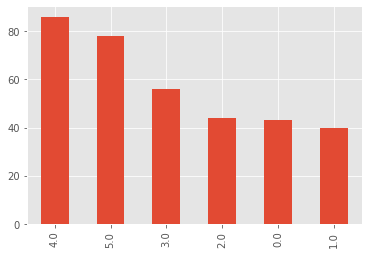

In [171]:
school_data['school_rating'].value_counts().plot(kind='bar')

In [172]:
school_data[['reduced_lunch','school_rating']].groupby(['school_rating']).describe()

reduced_lunch                        ...                   
                      count       mean        std  ...   50%    75%   max
school_rating                                      ...                   
0.0                    43.0  83.581395   8.813498  ...  86.0  90.00  98.0
1.0                    40.0  74.950000  11.644191  ...  74.5  84.25  98.0
2.0                    44.0  64.272727  11.956051  ...  62.5  74.00  88.0
3.0                    56.0  50.285714  13.550866  ...  48.5  63.00  78.0
4.0                    86.0  41.000000  16.681092  ...  41.5  50.00  87.0
5.0                    78.0  21.602564  17.651268  ...  19.0  29.75  87.0

[6 rows x 8 columns]

In [188]:
school_data.head()

,name,school_rating,size,reduced_lunch,state_percentile_16,state_percentile_15,stu_teach_ratio,school_type,avg_score_15,avg_score_16,full_time_teachers,percent_black,percent_white,percent_asian,percent_hispanic
0,Allendale Elementary School,5.0,851.0,10.0,90.2,95.8,15.7,Public,89.4,85.2,54.0,2.9,85.5,1.6,5.6
1,Anderson Elementary,2.0,412.0,71.0,32.8,37.3,12.8,Public,43.0,38.3,32.0,3.9,86.7,1.0,4.9
2,Avoca Elementary,4.0,482.0,43.0,78.4,83.6,16.6,Public,75.7,73.0,29.0,1.0,91.5,1.2,4.4
3,Bailey Middle,0.0,394.0,91.0,1.6,1.0,13.1,Public Magnet,2.1,4.4,30.0,80.7,11.7,2.3,4.3
4,Barfield Elementary,4.0,948.0,26.0,85.3,89.2,14.8,Public,81.3,79.6,64.0,11.8,71.2,7.1,6.0


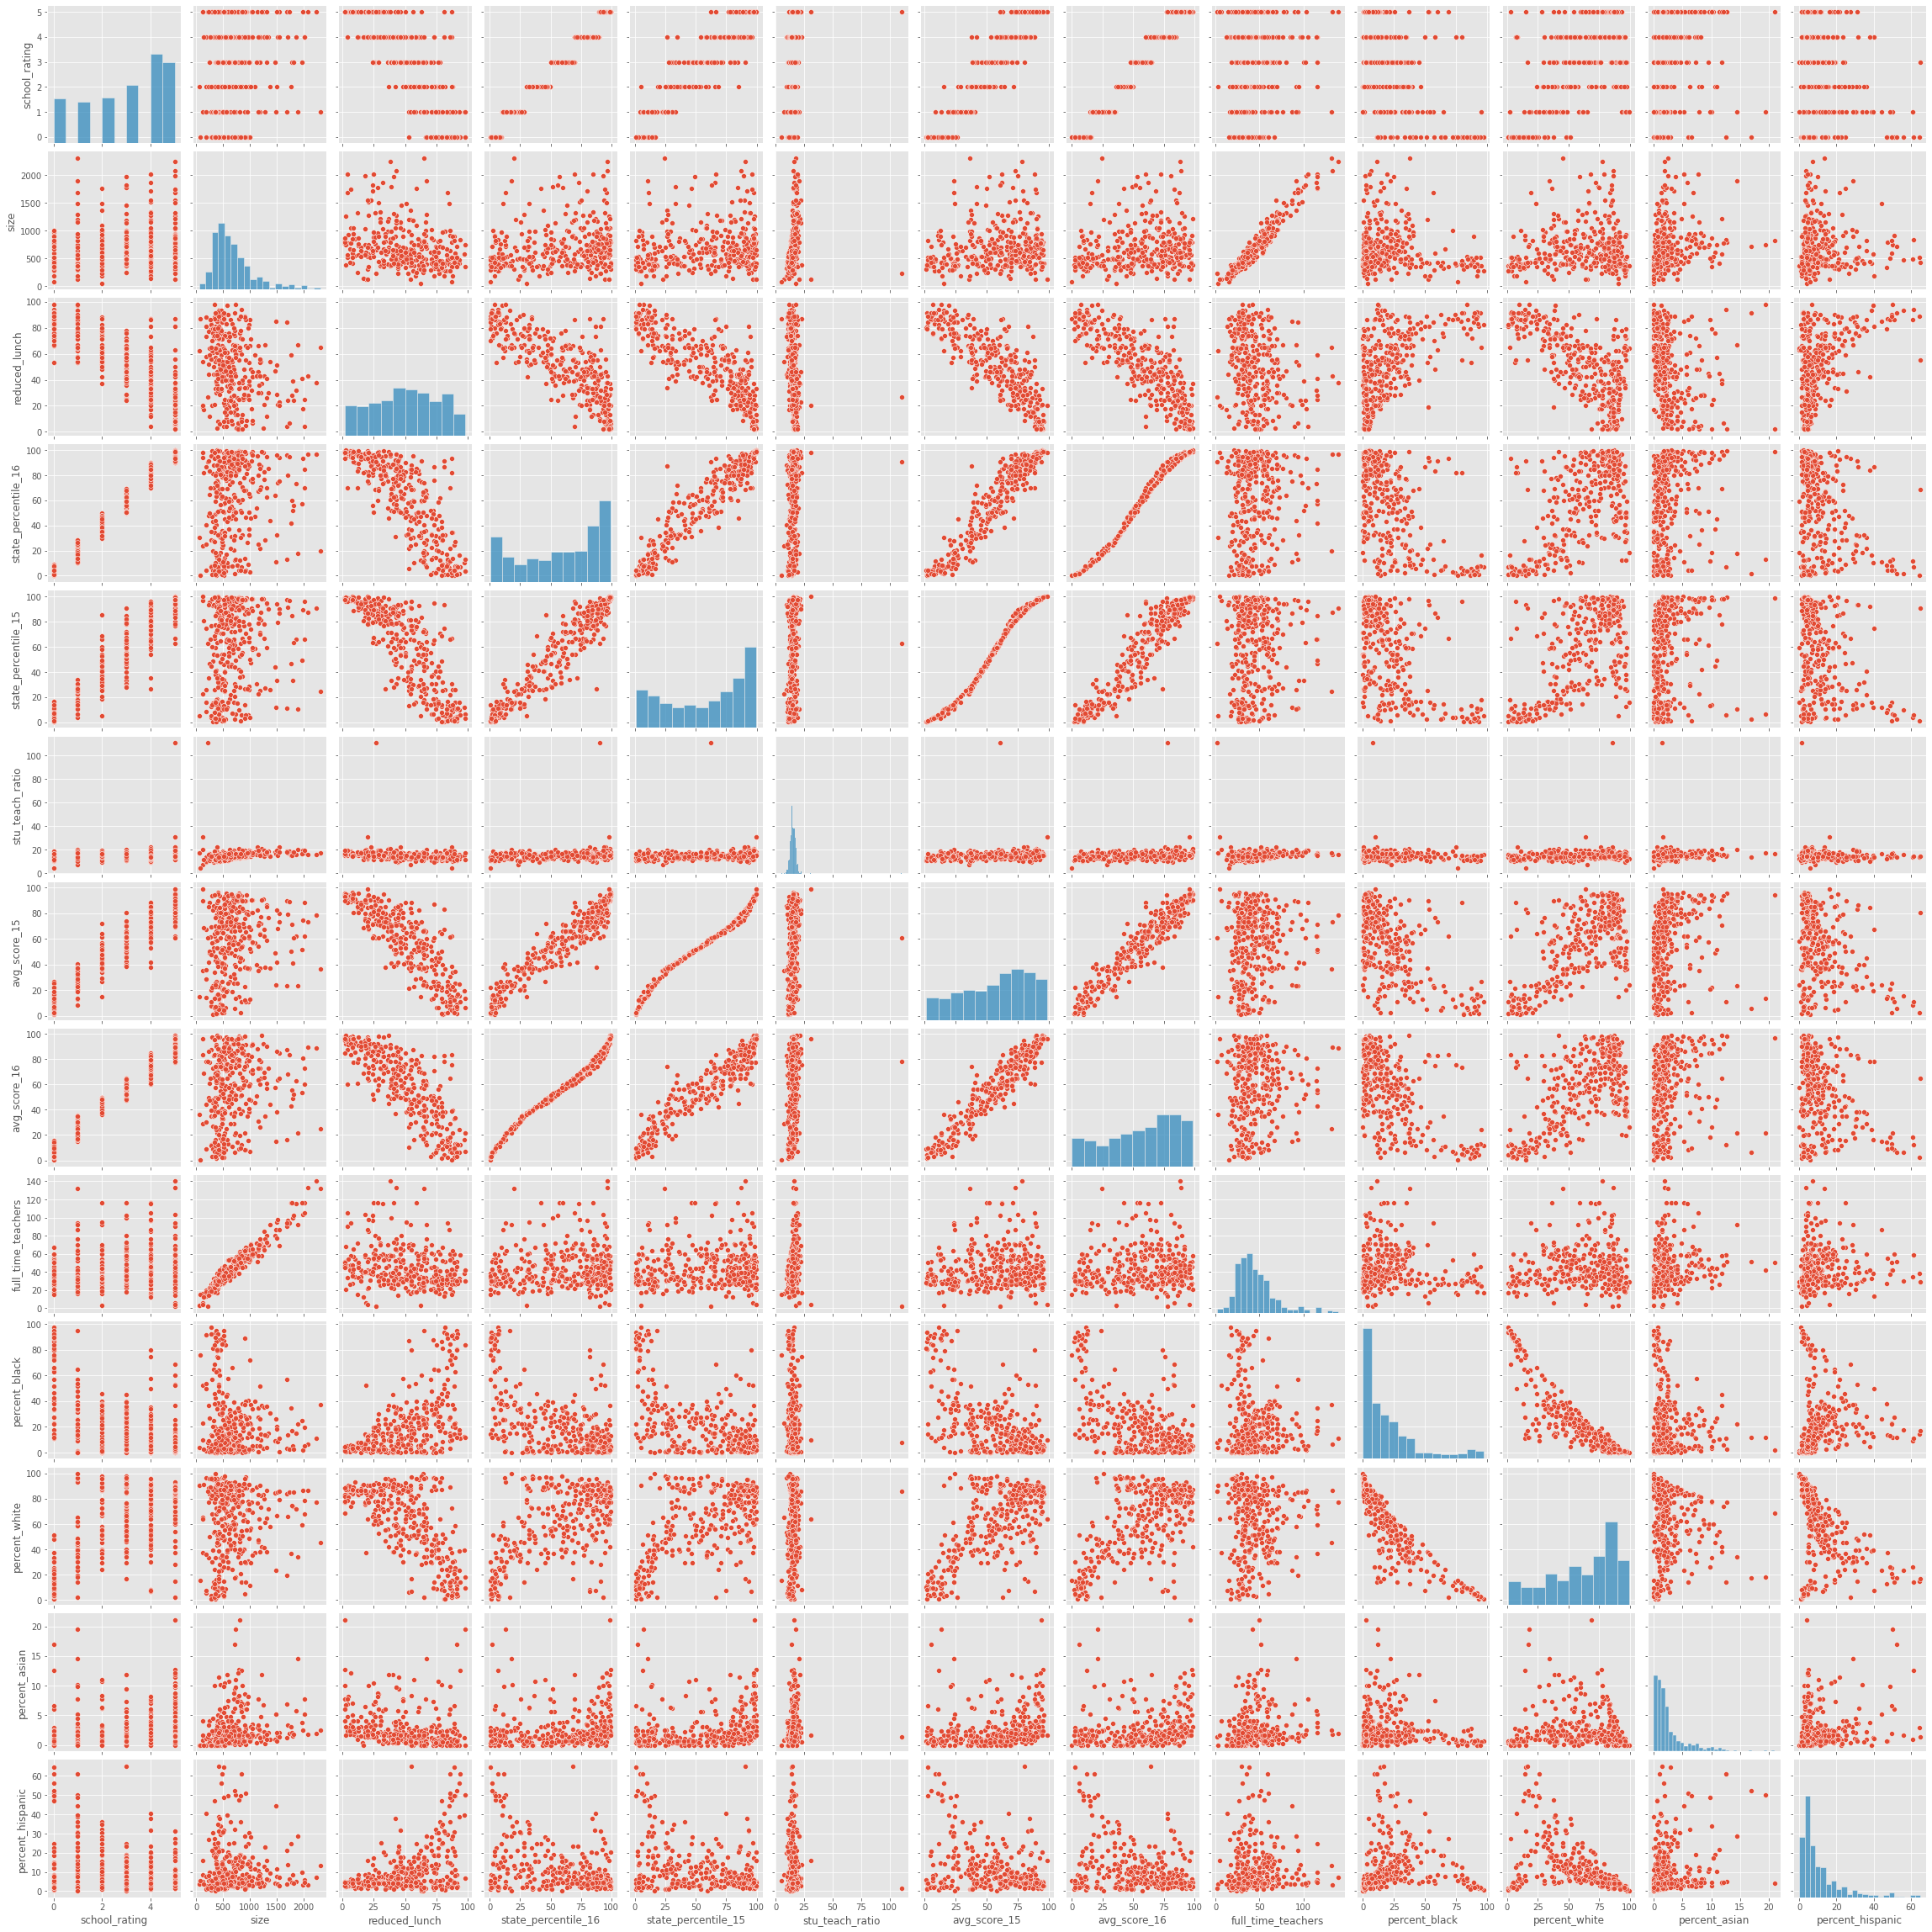

In [191]:
sns.pairplot(school_data)

In [177]:
print(school_data[['reduced_lunch','school_rating']].corr())

               reduced_lunch  school_rating
reduced_lunch       1.000000      -0.815757
school_rating      -0.815757       1.000000


In [198]:
print(school_data[['full_time_teachers','size']].corr())

                    full_time_teachers     size
full_time_teachers             1.00000  0.96688
size                           0.96688  1.00000


In [194]:
print(school_data[['avg_score_15','avg_score_16']].corr())

              avg_score_15  avg_score_16
avg_score_15      1.000000      0.953714
avg_score_16      0.953714      1.000000


#### Out of all the features only 'full_time_teachers' with 'size' and 'avg_score_15' with 'avg_score_16' are positively Correlated,rest are either no or negatively correlated. 

### 5. In the udise dataset, we had created a correlation between girls dropout and infrastructure of schools for the state of West Bengal. But we did not do noise reduction using PCA. Complete the same for the aforementioned states using PCA. [Hint: Refer to West Bengal Analysis on udise dataset]

In [203]:
pca_df = pd.get_dummies(school)

In [221]:
y = pca_df['GROWTHRATE'].values
X = pca_df.drop('GROWTHRATE',axis=1).values

In [219]:
X.shape

(670, 1138)

In [212]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X) # normalizing the features

In [224]:
import numpy as np
X= np.nan_to_num(X)

In [225]:
from sklearn.decomposition import PCA
pca_school = PCA(n_components=12)
principalComponents_school = pca_school.fit_transform(X)

In [227]:
principal_school_Df = pd.DataFrame(data = principalComponents_school, columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12'])

In [230]:
principal_school_Df.tail()


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
665,-1.779747e+06,-82244.006727,-8224.959770,-39474.382082,-10189.117684,4395.835732,1969.031961,-13295.818021,8368.916932,9811.063745,12418.122053,-786.760957
666,-1.617282e+06,-92542.590829,-9575.348913,-33939.131892,-3455.037440,923.547272,-6659.772440,-5844.598347,7382.933919,10881.150419,11195.523656,2586.419918
667,-1.579733e+06,-89292.507832,-14202.961351,-42806.754699,-1290.252055,-1264.423127,-3009.089490,-13054.554347,14015.507458,360.580252,7657.396600,-7562.525379
668,-1.785175e+06,-78092.997992,-6328.287939,-45291.474172,-12072.593167,4437.189710,-2.391772,-12868.002915,6857.892838,9529.273977,11668.036782,-1512.023397
669,-1.713996e+06,-74734.031362,-7721.109742,-47239.737400,-9410.709351,4153.527062,-1602.400292,-11846.940960,5488.956368,8765.494638,10960.766422,-3348.134342


#### We have reduced number of features from 670 to 12 using PCA